<a href="https://colab.research.google.com/github/sapnachavan7875-lgtm/Data-Science-Learning/blob/main/complete_walmart_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Walmart (1).csv')
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1    5/2/2010    1643690.90             0        42.31       2.572   
1         1   12/2/2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1    5/3/2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45   5/10/2012     733455.07             0        64.89       3.985   
6432     45  12/10/2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

**Checking Null values**

In [ ]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

**Checking Duplicate Values**

In [ ]:
df.duplicated().sum()

np.int64(0)

**Checking total stores**

In [ ]:
print(f"Total Stores:{df['Store'].count()}")

Total Stores:6435


**checking total weekly sales:**

In [ ]:
print(f"Total Weekly_Sales: {df['Weekly_Sales'].sum()}")

Total Weekly_Sales: 6737218987.11


## Removing date from index:
#sales.reset_index(inplace=True)
#
### Converting datatype of date column:
#sales['Date'] = pd.to_datetime(sales['Date'], format = '%d-%m-%Y')
#
## Resetting date back to index
#sales.set_index('Date',inplace=True)

**Checking outliers:**

In [ ]:
# Creating a variable to separate the numerical columns for numerical operations like finding outliers and statistical evidence:
num_columns = df.select_dtypes(include=np.number).columns
num_columns


Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
# Since Holiday flag is categorical we are excluding the column:
indices_to_remove = ['Holiday_Flag'] # Creating the varible with holiday flag column

#Removing Holiday flag columns with the help of difference function:
num_columns=num_columns.difference(indices_to_remove)

In [ ]:
num_columns

Index(['CPI', 'Fuel_Price', 'Store', 'Temperature', 'Unemployment',
       'Weekly_Sales'],
      dtype='object')

In [ ]:
import seaborn as sns

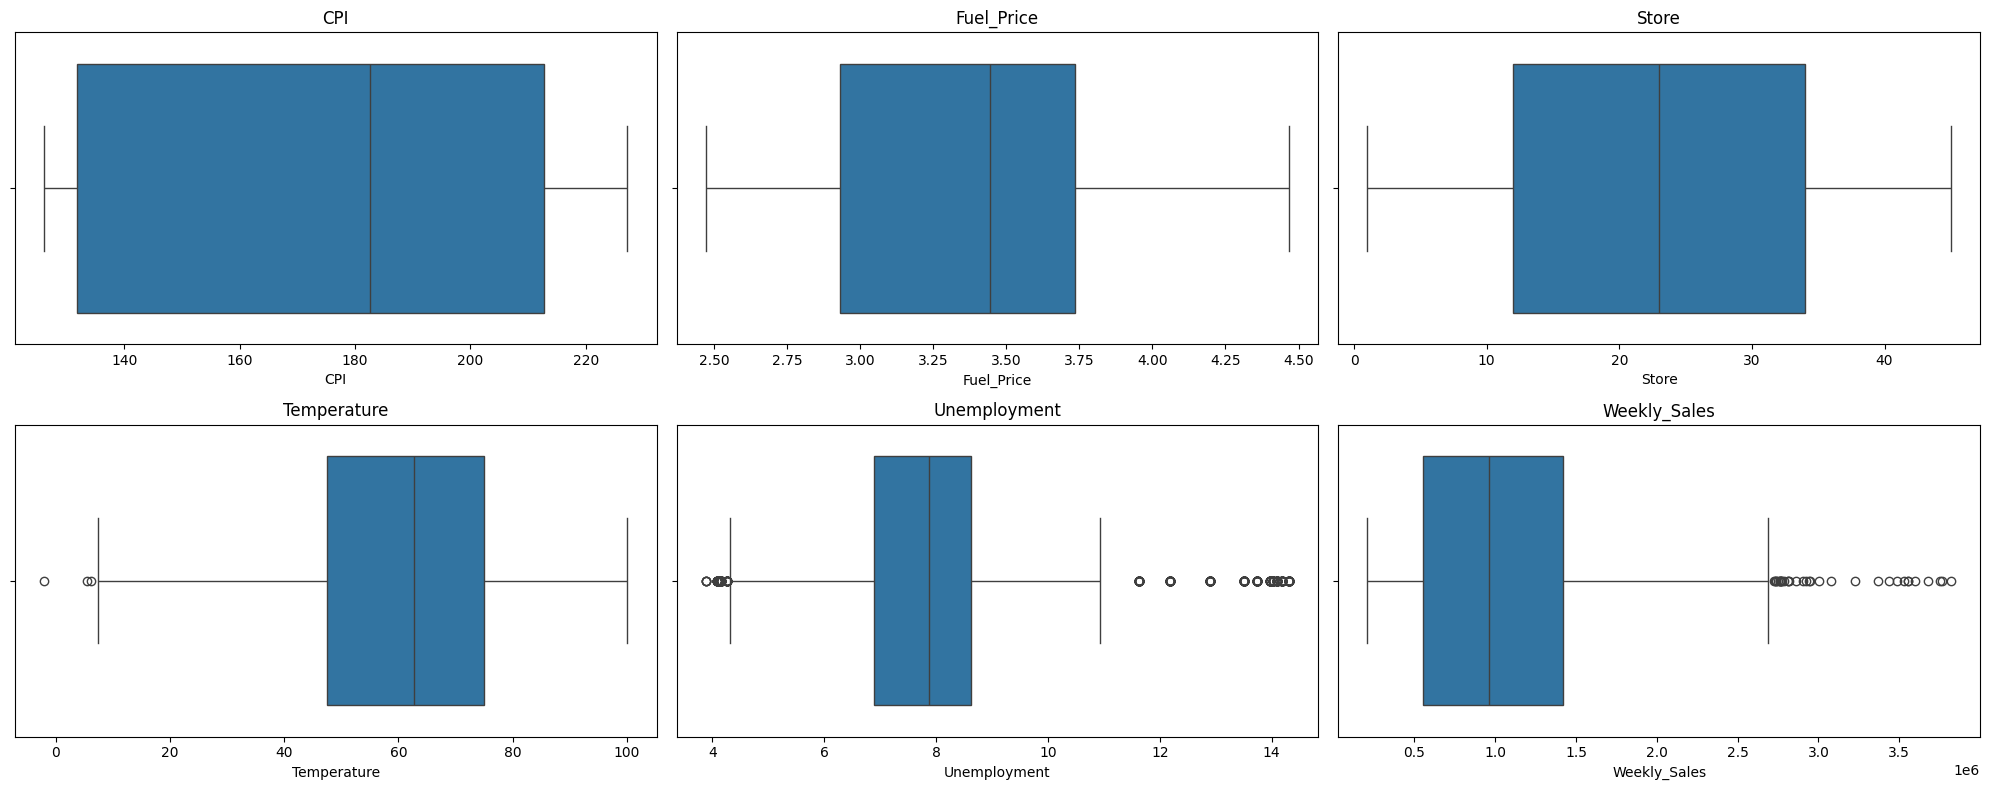

In [ ]:
# Finding Outliers with the help of box plot.
plt.figure(figsize=(20,8))

# Using for loop we looping the numeric columns through the dataset for plotting the outliers
for i,col in enumerate(num_columns):
    plt.subplot(2,3,i+1) # for sorting the plots
    sns.boxplot(x=df[col]) # for ploting the outliers
    plt.tight_layout() # just to confirm fit the plots appropriately
    plt.title(col)  # setting the title to the plots
plt.show()

In [ ]:
# Defining the function that can set the inter quartaile range which can define outliers range.
def remove_outliers(df1,col): # defing function name as remove_outliers
# Setting the Q1 range at the 0.25 percentile, which means the data falling below the 0.25 percentile will be treated as outliers.
    q1=df1[col].quantile(0.25)
# Setting the Q3 range at the 0.75 percentile, which means the data falling below the 0.75 percentile will be treated as outliers.
    q3=df1[col].quantile(0.75)
    IQR=q3-q1
    Lower_Band = q1-1.5*IQR # Setting the lower band for separate the outliers
    Upper_Band = q3+1.5*IQR # Setting the Upper band for separate the outliers

    #removing the data points which are falls below and above the upper bands and lower bands
    df[col]=np.clip(df[col],Lower_Band,Upper_Band)
    return df1

# Defining the function that can remove outliers
def treat_outliers(df1,col_list):
    for col in col_list:              # Using for loop to loop through col list of numeric column which we created earlier and dataset
        df1=remove_outliers(df1,col)  # removing the outliers from the data
    return df1

**Removing the Outliers**

In [ ]:
df=treat_outliers(df,num_columns)



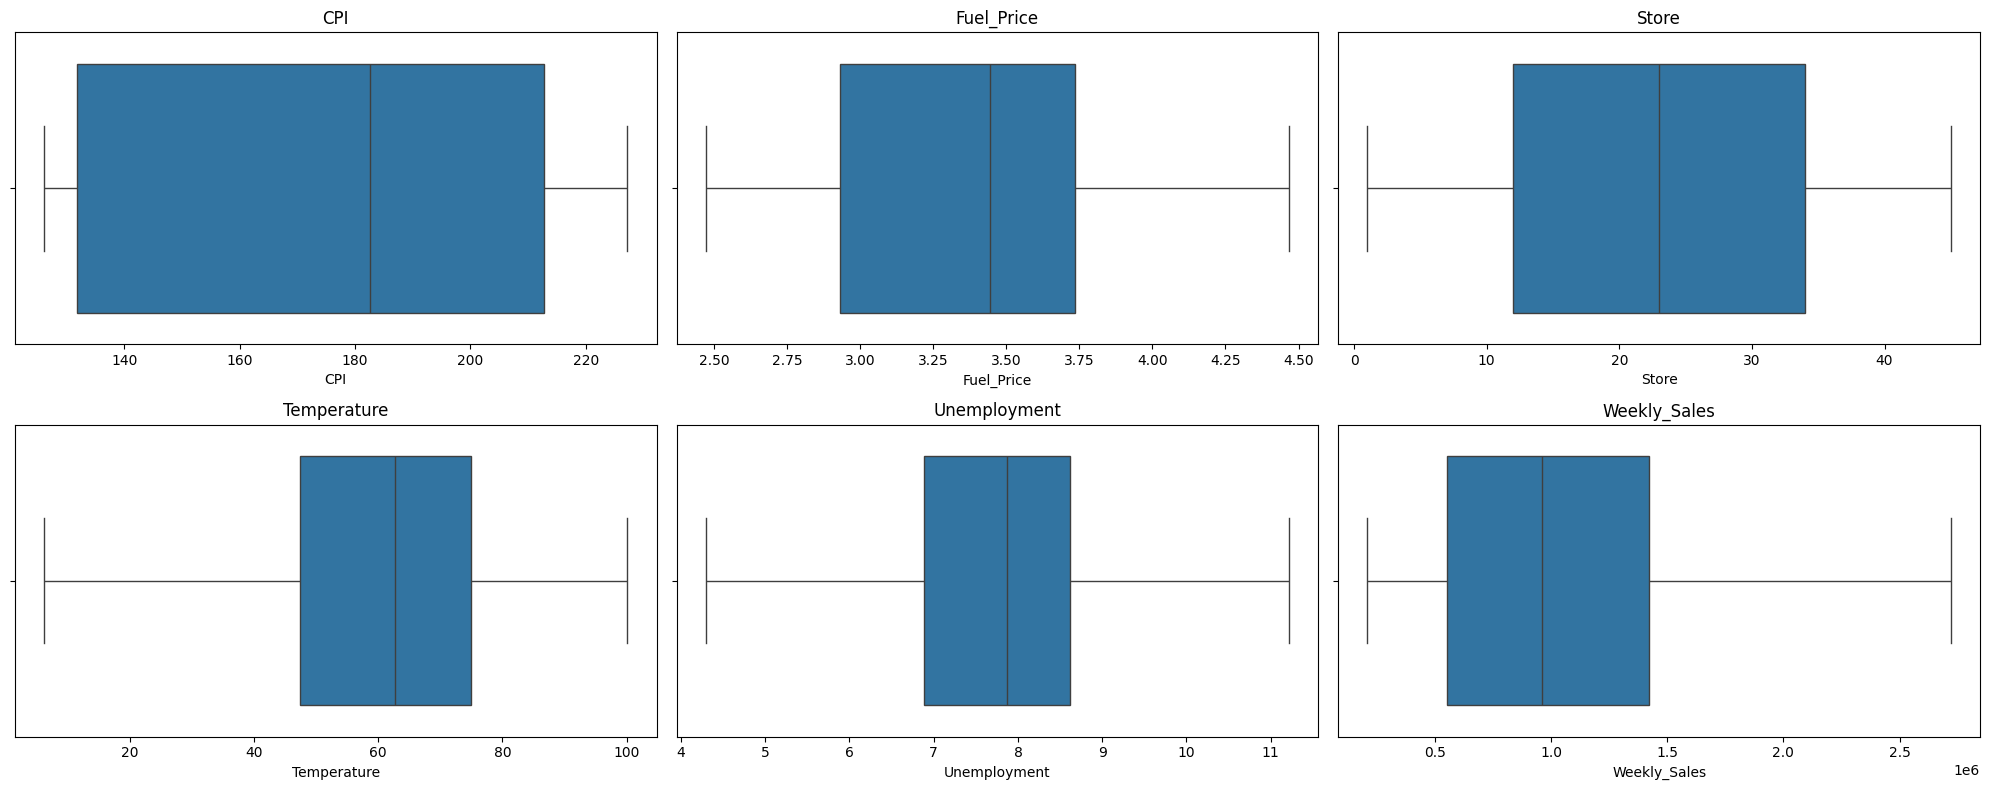

In [ ]:
 #Cross Checking the Outliers.
plt.figure(figsize=(20,8))

# Using for loop we looping the numeric columns thorough the dataset for plotting the outliers
for i,col in enumerate(num_columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.title(col)
plt.show()

**EDA**

In [ ]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1    5/2/2010    1643690.90             0        42.31       2.572   
1      1   12/2/2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1    5/3/2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

**Unemployment v/s Sales**

In [ ]:
 #Checking the lower band of unemployment rate:
df['Unemployment'].min()

4.2945

In [ ]:
# Checking the upper band of unemployment rate:
df['Unemployment'].max()

11.218499999999999

In [ ]:
# Creating the bins and labels to store the values:
bins3 = [4,6,8,10,12]
labels3 = ['4-6','6.1-8','8.1-10','10.1-12']

In [ ]:
# Creating new column in df:
df['Unemployment_Rate_Cat'] = pd.cut(df['Unemployment'],bins = bins3,labels = labels3)

In [ ]:
df['Unemployment_Rate_Cat'].value_counts()

Unemployment_Rate_Cat
6.1-8      2795
8.1-10     2389
10.1-12     629
4-6         622
Name: count, dtype: int64

In [ ]:
# Creating separte dataframe for the sales and Unemployment rate:

df_Unemp_Sales = df.groupby('Unemployment_Rate_Cat')['Weekly_Sales'].sum().reset_index()

/tmp/ipython-input-2103024685.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Unemp_Sales = df.groupby('Unemployment_Rate_Cat')['Weekly_Sales'].sum().reset_index()


<Axes: xlabel='Unemployment_Rate_Cat', ylabel='Weekly_Sales'>

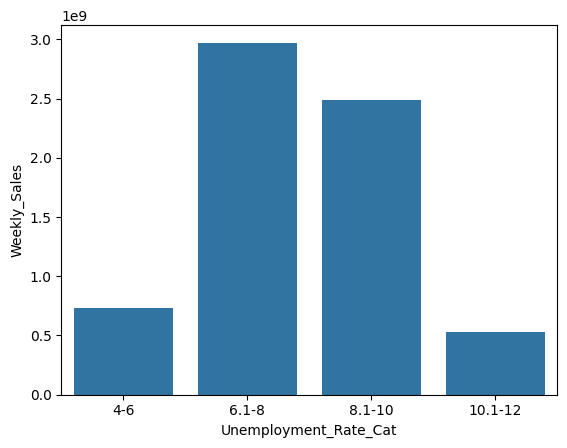

In [ ]:
sns.barplot(x='Unemployment_Rate_Cat',y='Weekly_Sales',data=df_Unemp_Sales)

**Inference:**

**When the Unemployment rate is between the 6 to 10 the stores are performing well
But whenever the Unemployment rate is increasing the sales went down**

**Store V/s Weekly Sales**

In [ ]:
df_store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

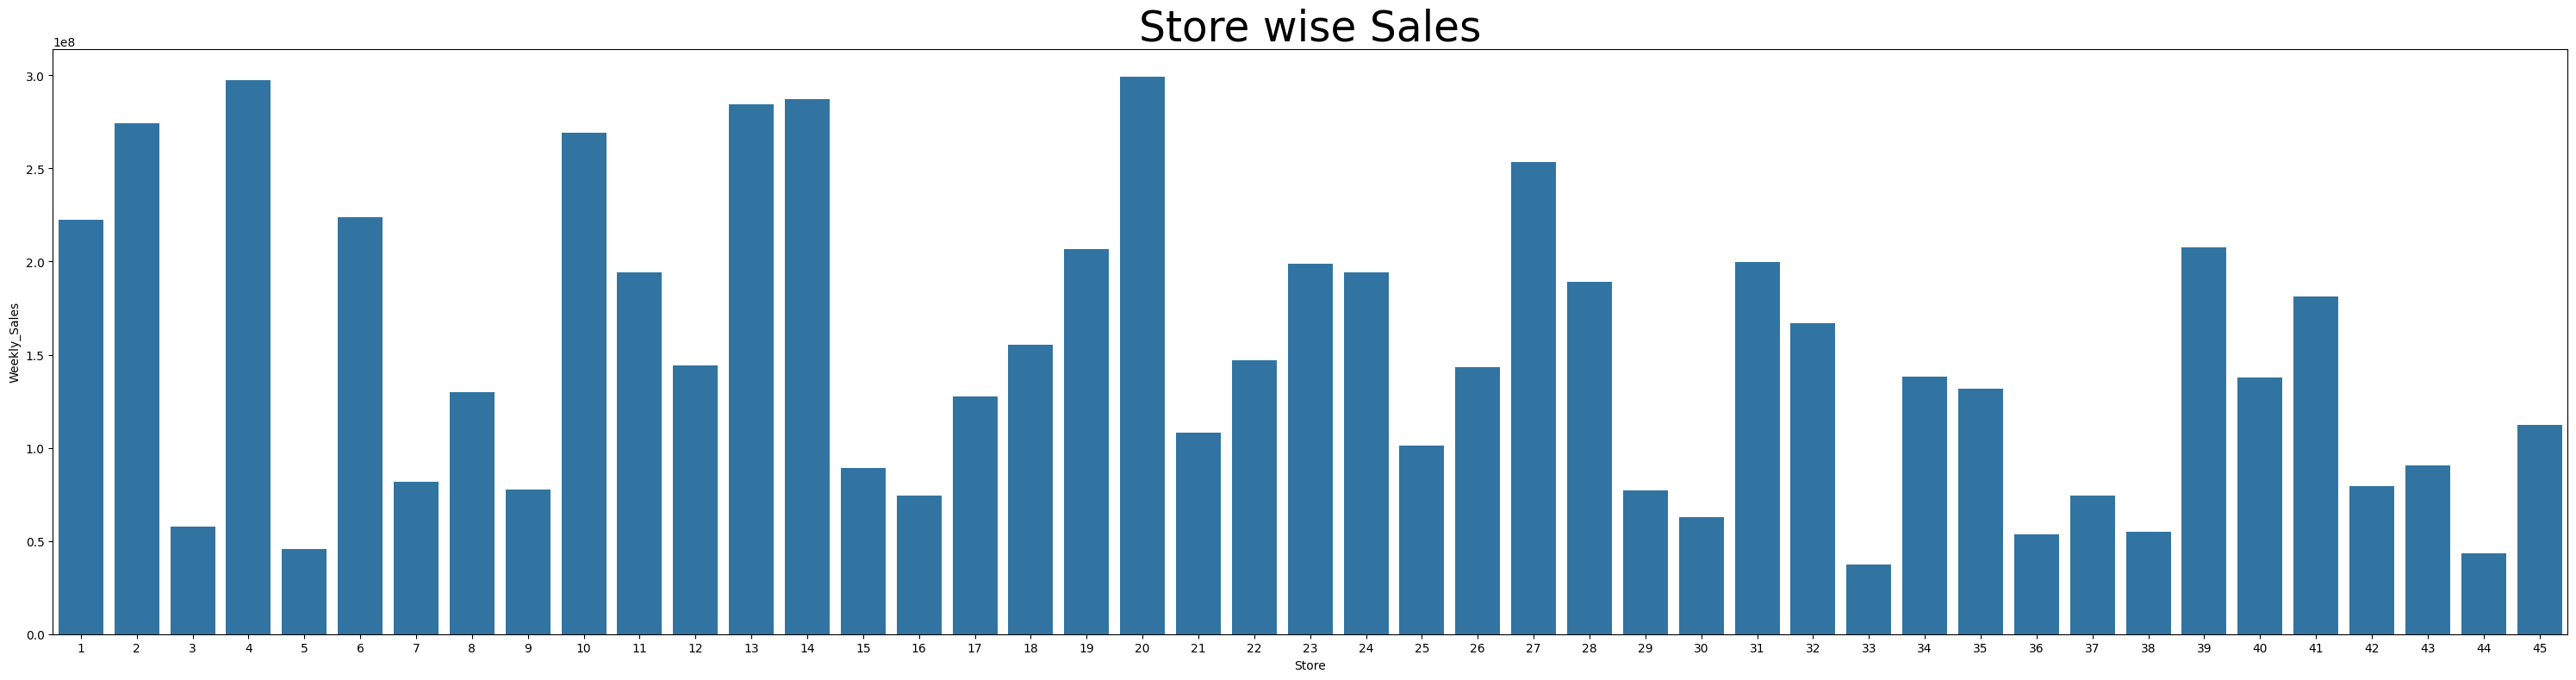

In [ ]:
plt.figure(figsize=(30,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df_store_sales)
plt.title('Store wise Sales',fontsize=35)
plt.tight_layout()
plt.show()

**Inference**


*   **Since we have 45 stores we cant take all the store sales. so we tried to plot top and botttom 10 stores saleswise.**


In [ ]:
 #Creating the dataframe which is having top 10 stores that can have highest weekly sales
top_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=False).head(10)
# Looking the dataframe
top_10_Sale_Store

Store  Weekly_Sales
19     20  2.990663e+08
3       4  2.973575e+08
13     14  2.870091e+08
12     13  2.845247e+08
1       2  2.741628e+08
9      10  2.692807e+08
26     27  2.534795e+08
5       6  2.237489e+08
0       1  2.224028e+08
38     39  2.074455e+08

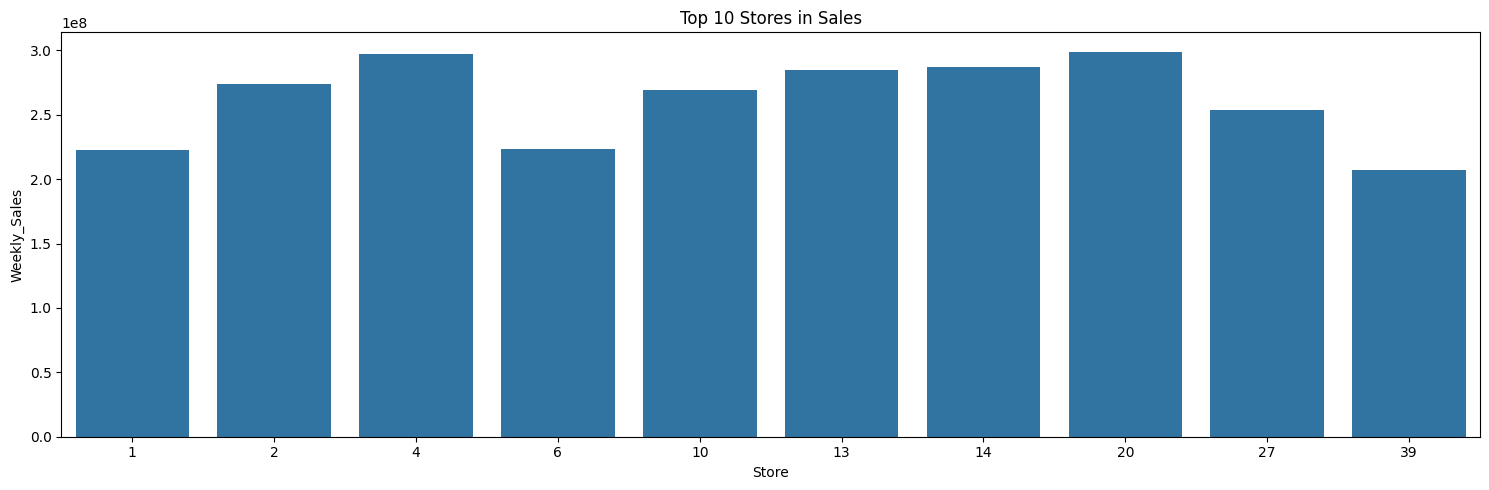

In [ ]:
# Plotting the top 10 stores:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=top_10_Sale_Store)
plt.title('Top 10 Stores in Sales')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.tight_layout() # this can help the barplot to set correctly in the frame
plt.show()

**Inference:**


*   **The Stores 4,20,14 is having the highest sales in top 10 stores segment.**
*   **The Stores 6,39 is having the Lowest sales in top 10 stores segment.**

In [ ]:
# Creating the dataframe which is having Bottom 10 stores that can have Lowest weekly sales:
Bottom_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=True).head(10)
Bottom_10_Sale_Store

Store  Weekly_Sales
32     33   37160221.96
43     44   43293087.84
4       5   45475688.90
35     36   53412214.97
37     38   55159626.42
2       3   57586735.07
29     30   62716885.12
36     37   74202740.32
15     16   74252425.40
28     29   77141554.31

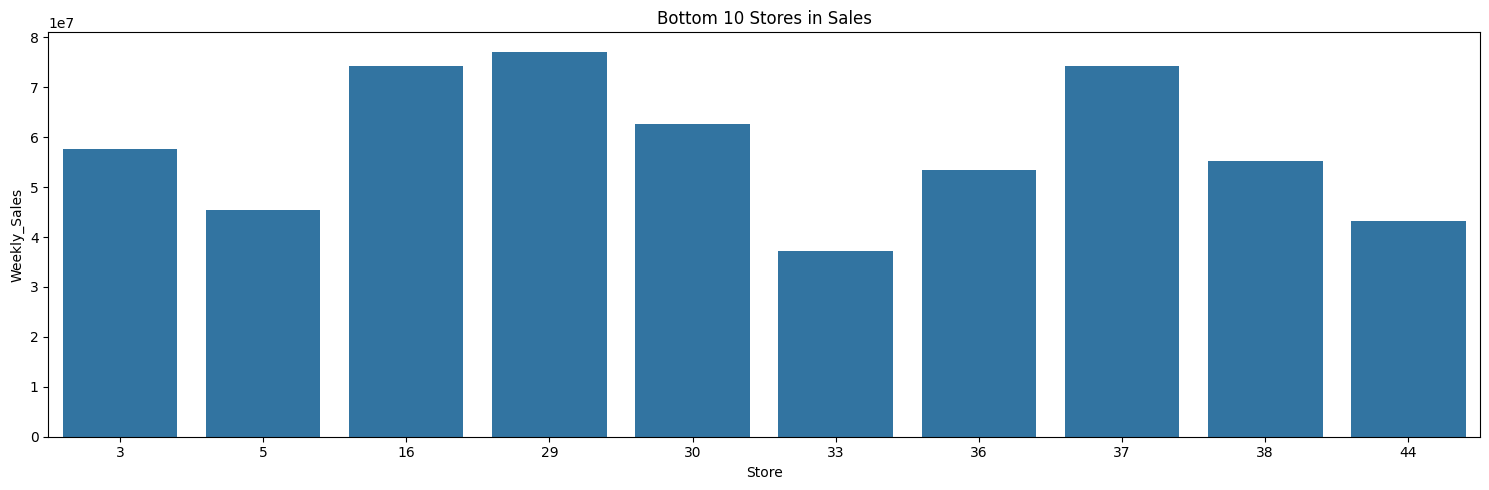

In [ ]:
# plotting the Bottom 10 stores:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=Bottom_10_Sale_Store)
plt.title('Bottom 10 Stores in Sales')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.tight_layout()
plt.show()

**Inference:**

*   **The Stores 29,16,37 is having the highest sales in Bottom 10 stores segment.**
*   **The Stores 33,44 is having the highest sales in Bottom 10 stores segment.**

**Sales V/s Holidays**

In [ ]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [ ]:
# Creating a new datafram that contains holiday and weekly sales summation
df_Hf_Sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()

In [ ]:
df_Hf_Sales

Holiday_Flag  Weekly_Sales
0             0  6.220935e+09
1             1  5.038284e+08

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

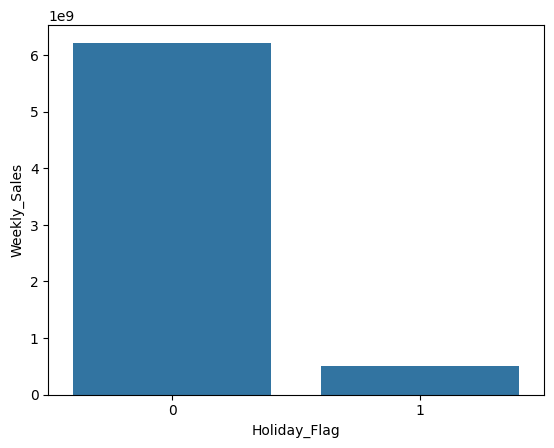

In [ ]:
sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=df_Hf_Sales)

**Inference:**


*   **The Sales are High In Normal Days, it is Quite common because of that holidays are always low compared to working days.**


**Temperature v/s sales**

In [ ]:
df['Temperature'].min()

6.240000000000002

In [ ]:
df['Temperature'].max()

100.14

In [ ]:
bins = [0,25,50,75,100]
labels = ['0-25','26-50','51-75','76-100']

In [ ]:
df['Temp_Category']= pd.cut(df['Temperature'],bins=bins,labels=labels)

In [ ]:
df['Temp_Category'].value_counts()

Temp_Category
51-75     2982
26-50     1631
76-100    1596
0-25       224
Name: count, dtype: int64

In [ ]:
# finding sales pattren during these temp levels
df_temp_sales = df.groupby('Temp_Category')['Weekly_Sales'].sum().reset_index()

/tmp/ipython-input-2733310922.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp_sales = df.groupby('Temp_Category')['Weekly_Sales'].sum().reset_index()


<Axes: xlabel='Temp_Category', ylabel='Weekly_Sales'>

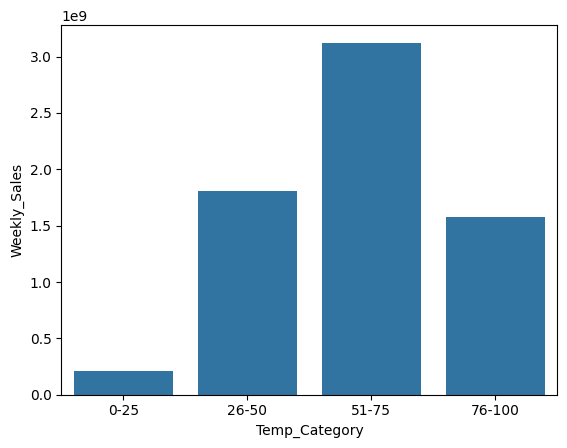

In [ ]:
# Plotting the weekly sales distribution on barplot
sns.barplot(x='Temp_Category',y='Weekly_Sales',data=df_temp_sales)

**Fuel_Price V/s Sales**

In [ ]:
df['Fuel_Price'].min()

2.472

In [ ]:
df['Fuel_Price'].max()

4.468

In [ ]:
# Creating bins and labels to categorize the fuel prices:
bins1 = [2,2.5,3,3.5,4,4.5]
labels1 = ['2-2.5','2.6-3','3.1-3.5','3.6-4','4.1-4.5']

In [ ]:
df['Fuel_Price_Cat']= pd.cut(df['Fuel_Price'],bins=bins1,labels=labels1)

In [ ]:
df['Fuel_Price_Cat'].value_counts()

Fuel_Price_Cat
3.6-4      2625
2.6-3      1872
3.1-3.5    1533
4.1-4.5     404
2-2.5         1
Name: count, dtype: int64

In [ ]:
df_Fuel_Price_Sales = df.groupby('Fuel_Price_Cat')['Weekly_Sales'].sum().reset_index()

/tmp/ipython-input-3337354241.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Fuel_Price_Sales = df.groupby('Fuel_Price_Cat')['Weekly_Sales'].sum().reset_index()


In [ ]:
df_Fuel_Price_Sales

Fuel_Price_Cat  Weekly_Sales
0          2-2.5  4.702810e+05
1          2.6-3  1.945889e+09
2        3.1-3.5  1.620472e+09
3          3.6-4  2.738130e+09
4        4.1-4.5  4.198009e+08

In [ ]:
df_Fuel_Price_Sales

Fuel_Price_Cat  Weekly_Sales
0          2-2.5  4.702810e+05
1          2.6-3  1.945889e+09
2        3.1-3.5  1.620472e+09
3          3.6-4  2.738130e+09
4        4.1-4.5  4.198009e+08

<Axes: xlabel='Fuel_Price_Cat', ylabel='Weekly_Sales'>

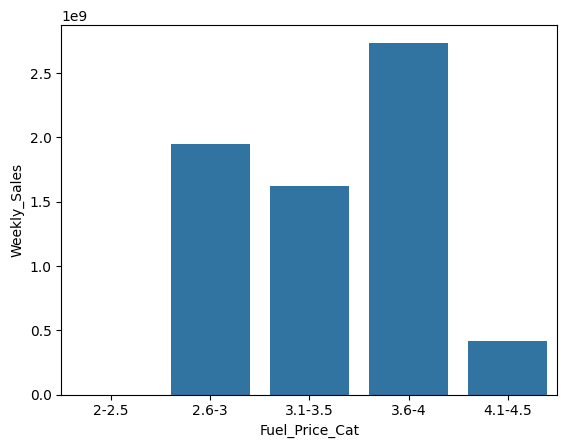

In [ ]:
sns.barplot(x='Fuel_Price_Cat',y='Weekly_Sales',data=df_Fuel_Price_Sales)

**Inference:**


*   **When the fuel prices are modereate the performance of stores are also moderatly high.**
*   **But the fuel Price went above the modereate level that is 3.5, and the sales are also went very High.. May be the Inflation and fear of increasing prices people are bought more grocery to metigate with inflation.**
*   **And when fuel price went even high the purchase power of people went down. may be the inflation and increasing in goods price.**


**CPI v/s Sales**

In [ ]:
df['CPI'].min()

126.064

In [ ]:
df['CPI'].max()

227.2328068

In [ ]:
# Creating bins and labels for categorization of inflation rate:
bins2=[125,155,185,215,245]
labels2=['125-155','156-185','186-215','216-245',]

In [ ]:
# Creating a new column called CPI Category:
df['CPI_cat']= pd.cut(df['CPI'],bins=bins2,labels=labels2)

In [ ]:
df_Cpi_Sales = df.groupby('CPI_cat')['Weekly_Sales'].sum().reset_index()

/tmp/ipython-input-2747547455.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Cpi_Sales = df.groupby('CPI_cat')['Weekly_Sales'].sum().reset_index()


In [ ]:
df_Cpi_Sales

CPI_cat  Weekly_Sales
0  125-155  3.400064e+09
1  156-185  1.738193e+08
2  186-215  2.028806e+09
3  216-245  1.122074e+09

<Axes: xlabel='CPI_cat', ylabel='Weekly_Sales'>

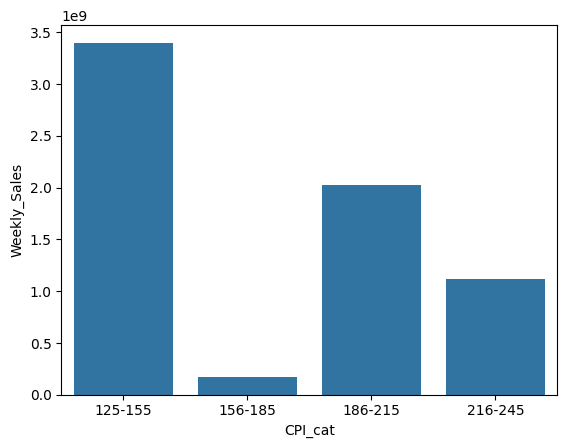

In [ ]:
sns.barplot(x='CPI_cat',y='Weekly_Sales',data=df_Cpi_Sales)

**Inference:**


*   **when inflation is lower the performance of stores are high.**
*   **In intial time of inflation the sale were drop signficantly.**
*   **In third level when inflation is high the people may scared for future prices and bought more grocery for future needs also.**
*   **eventually when the inflation went peaks the sales are went down.**

**Date V/s Weekly Sales**

In [ ]:
# Converting the data type of the date column to date time format from "object" Type:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
# Creating the dataframe by grouping the date and summing all the weekly sales for the particular 'Date'
df_date_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_date_sales=df_date_sales.sort_values(by='Date',ascending=True) # Sorting the values in the dataframe to ascending
df_date_sales.head(5)

Date  Weekly_Sales
0 2010-01-10   42239875.87
1 2010-02-04   50423831.26
2 2010-02-07   48917484.50
3 2010-03-09   47194257.61
4 2010-03-12   49909027.88

In [ ]:
df_date_sales.shape

(57, 2)

Text(0, 0.5, 'Sales')

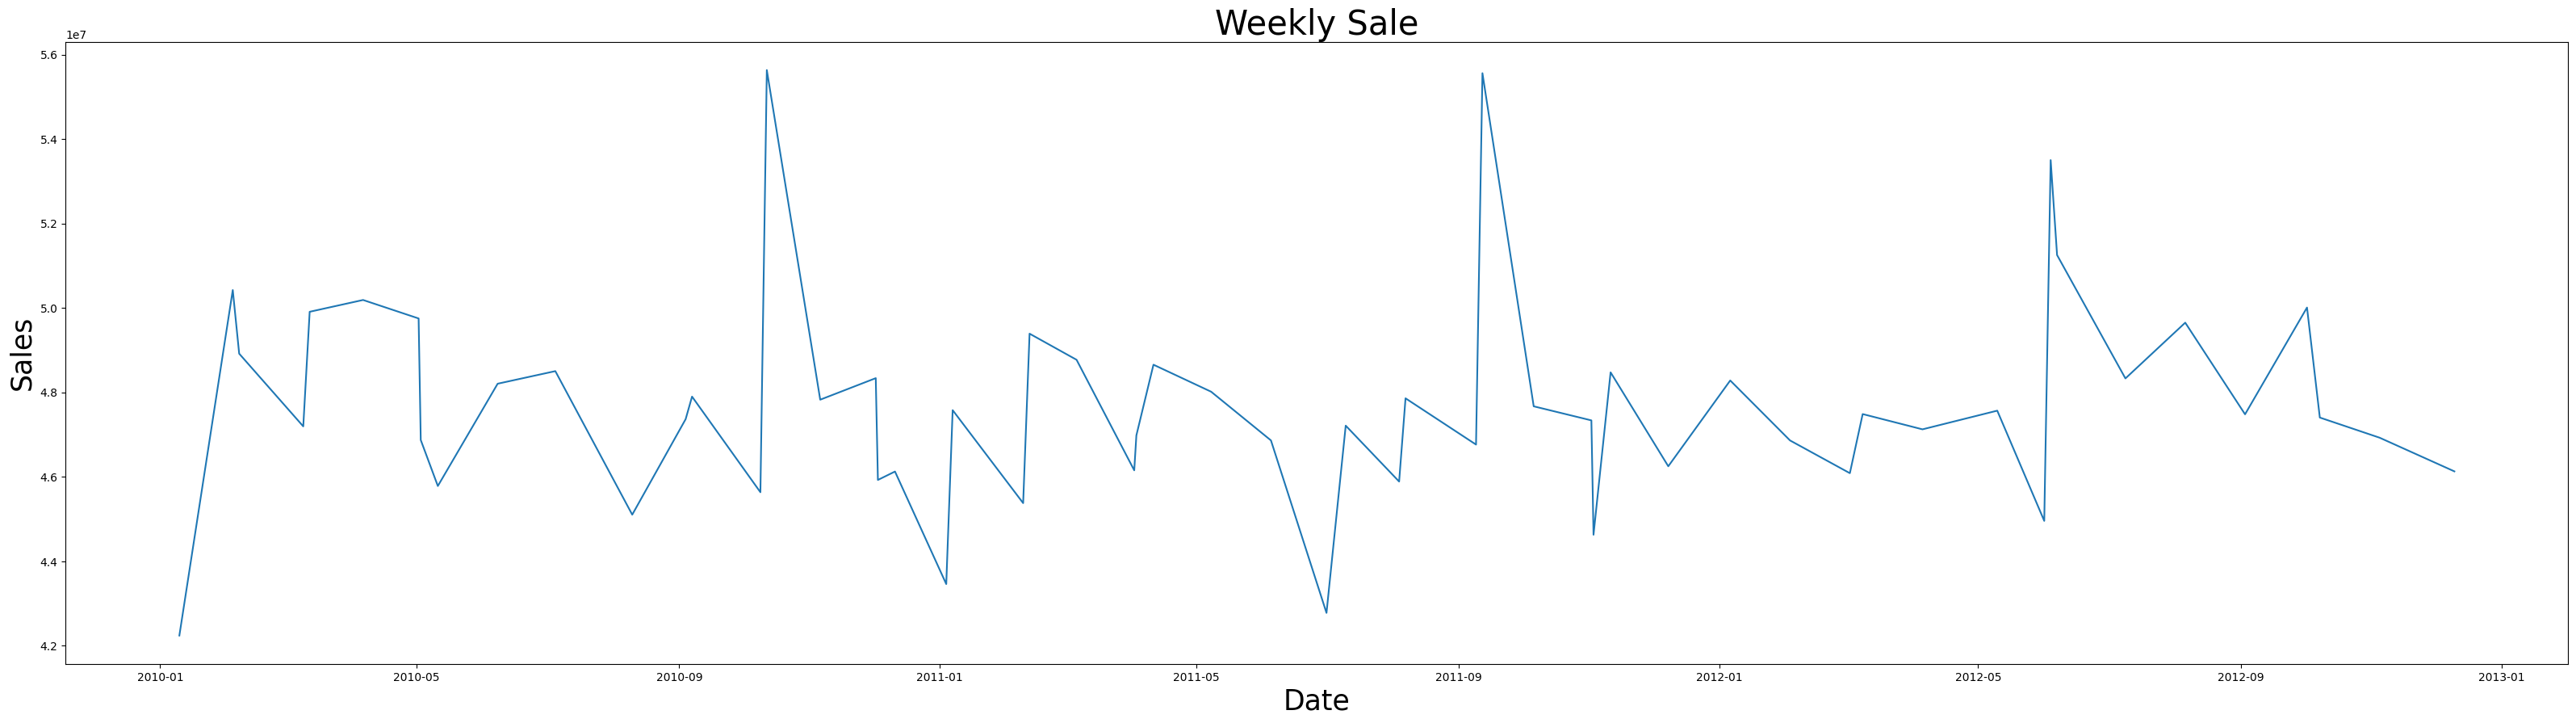

In [ ]:
# Plotting the line chart for checking the trend of weekly sales:
plt.figure(figsize=(40,10))
sns.lineplot(x='Date',y='Weekly_Sales',data=df_date_sales)
plt.title('Weekly Sale',fontsize=30)
plt.xlabel('Date',fontsize=25)
plt.ylabel('Sales',fontsize=25)

**Inference:**


*   **Weekly Sales most of weeks are consolidating expect some quarters.**
*   **We will See what quarters they are.**


In [ ]:
# Categorizing the sales into quarters:
df['Quarters'] = df['Date'].dt.to_period("Q")

In [ ]:
# creating a new dataframe by grouping the quarters with summation of the weekly sales:
df_quarter_sales = df.groupby('Quarters')['Weekly_Sales'].sum().reset_index()

In [ ]:
df_quarter_sales

Quarters  Weekly_Sales
0    2010Q1  2.386845e+08
1    2010Q2  2.407977e+08
2    2010Q3  1.888710e+08
3    2010Q4  2.894828e+08
4    2011Q1  2.345767e+08
5    2011Q2  2.366667e+08
6    2011Q3  2.860586e+08
7    2011Q4  2.343570e+08
8    2012Q1  1.887142e+08
9    2012Q2  2.444016e+08
10   2012Q3  1.454617e+08
11   2012Q4  1.904673e+08

<Axes: xlabel='Quarters', ylabel='Weekly_Sales'>

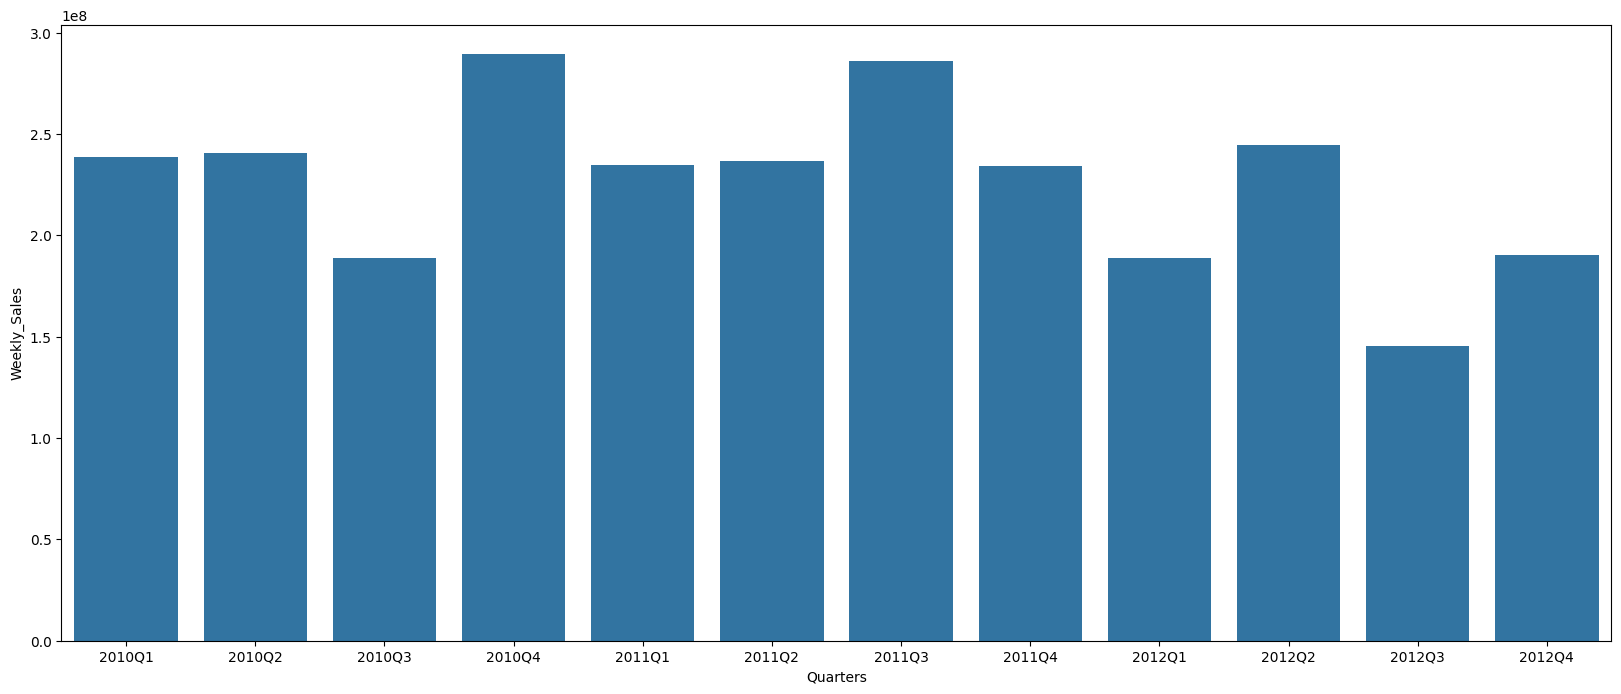

In [ ]:
# Plotting barplot to asses the quarter wise sales
plt.figure(figsize=(20,8))
sns.barplot(x='Quarters',y='Weekly_Sales',data=df_quarter_sales)

**Inference:**


*   **In 2010 the Q2,Q4 Performed well.**
*   **In 2011 also perofomnce is continued and Q4 is in peak sales.**
*   **In 2012 the perofomnce got distrubed and Q2 Sales are high and Q4 is turned in very bad performance comparing all 3 years**

# **Statistical Analysis**

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

**Correlation Analysis**

In [ ]:
df_Encode = df[['Quarters','Temp_Category','Fuel_Price_Cat','CPI_cat','Unemployment_Rate_Cat']].copy()

In [ ]:
df_Encode['Quarters']=Le.fit_transform(df['Quarters'])
df_Encode['Temp_Category']=Le.fit_transform(df['Temp_Category'])
df_Encode['Fuel_Price_Cat']=Le.fit_transform(df['Fuel_Price_Cat'])
df_Encode['CPI_cat']=Le.fit_transform(df['CPI_cat'])
df_Encode['Unemployment_Rate_Cat']=Le.fit_transform(df['Unemployment_Rate_Cat'])
df_Encode['Weekly_Sales']=Le.fit_transform(df['Weekly_Sales'])

In [ ]:
corr_df = df_Encode.corr()

<Axes: >

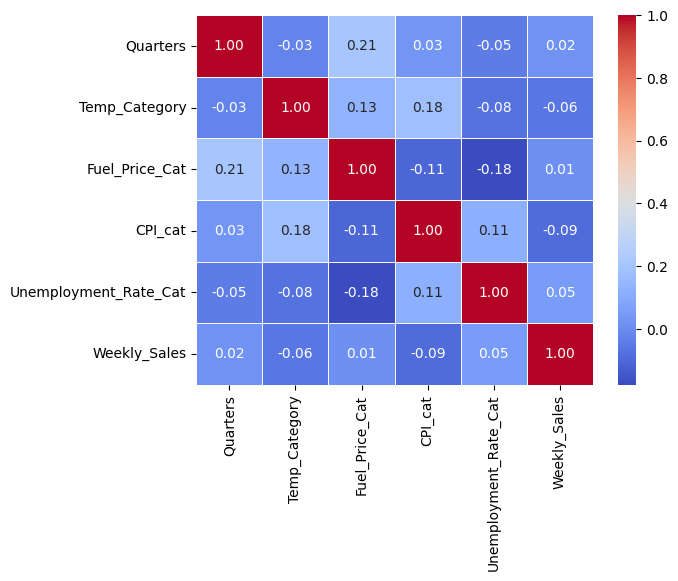

In [ ]:
sns.heatmap(corr_df,annot=True,cmap='coolwarm',fmt=".2f",linewidths=.5)

**Inference:**


*   **Quarters and Fuel Price having high correlation.**
*   **Because the fuel prices are also depend on the seasonal changes.**


**a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?**

<Axes: xlabel='Unemployment_Rate_Cat', ylabel='Weekly_Sales'>

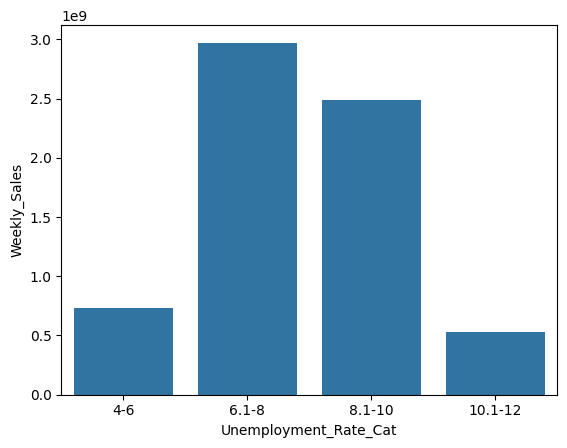

In [ ]:
sns.barplot(x='Unemployment_Rate_Cat',y='Weekly_Sales',data=df_Unemp_Sales)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Store                  6435 non-null   int64         
 1   Date                   2565 non-null   datetime64[ns]
 2   Weekly_Sales           6435 non-null   float64       
 3   Holiday_Flag           6435 non-null   int64         
 4   Temperature            6435 non-null   float64       
 5   Fuel_Price             6435 non-null   float64       
 6   CPI                    6435 non-null   float64       
 7   Unemployment           6435 non-null   float64       
 8   Unemployment_Rate_Cat  6435 non-null   category      
 9   Temp_Category          6433 non-null   category      
 10  Fuel_Price_Cat         6435 non-null   category      
 11  CPI_cat                6435 non-null   category      
 12  Quarters               2565 non-null   period[Q-DEC] 
dtypes: 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder=LabelEncoder()

In [ ]:
df['Unemployment_Rate_Cat'] = label_encoder.fit_transform(df['Unemployment_Rate_Cat'])

In [ ]:
filtered_df = df[df['Unemployment_Rate_Cat'].isin([1, 0])]

In [ ]:
sales_unemp_store= filtered_df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [ ]:
sales_unemp_store

Store  Weekly_Sales
0       4  1.782381e+08
1       5  1.416884e+07
2       6  4.684711e+07
3       8  3.923392e+07
4       9  2.397403e+07
5      12  1.442872e+08
6      13  6.152466e+07
7      16  2.016068e+06
8      17  1.623276e+07
9      23  1.987367e+08
10     28  1.892637e+08
11     29  3.276784e+07
12     33  2.299155e+06
13     34  6.496434e+07
14     38  5.515963e+07
15     40  1.378703e+08
16     43  4.080224e+07
17     44  1.418737e+07

In [ ]:
# Since We have 17 stores that are suffering.
# but i took only 10 stores which suffering more than others stores which are in those 17 stores

print('Most Suffered Stores with Unemployment Rate is listed Below : ')
sales_unemp_store.sort_values(by='Weekly_Sales',ascending=True).head(10)

Most Suffered Stores with Unemployment Rate is listed Below : 


Store  Weekly_Sales
7      16    2016067.98
12     33    2299155.24
1       5   14168838.13
17     44   14187373.72
8      17   16232762.69
4       9   23974029.58
11     29   32767838.68
3       8   39233920.13
16     43   40802240.25
2       6   46847107.04

In [ ]:
# Since We have 17 stores that are suffering.
# but i took only 10 stores which suffering more than others stores which are in those 17 stores

print('Most Suffered Stores with Unemployment Rate is listed Below : ')
sales_unemp_store.sort_values(by='Weekly_Sales',ascending=True).head(10)

Most Suffered Stores with Unemployment Rate is listed Below : 


Store  Weekly_Sales
7      16    2016067.98
12     33    2299155.24
1       5   14168838.13
17     44   14187373.72
8      17   16232762.69
4       9   23974029.58
11     29   32767838.68
3       8   39233920.13
16     43   40802240.25
2       6   46847107.04

In [ ]:
# Weekly Sales
df_stores_sales =df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_stores_sales.set_index('Date',inplace=True) # Setting the Date column as an Index
from statsmodels.tsa.seasonal import seasonal_decompose
sales_decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)


# Temperature
df_Temperature =df.groupby('Date')['Temperature'].sum().reset_index()
df_Temperature.set_index('Date',inplace=True) # Setting the Date column as an Index
Temperature_decomposition=seasonal_decompose(df_Temperature['Temperature'],period=13)

Figure(640x480)


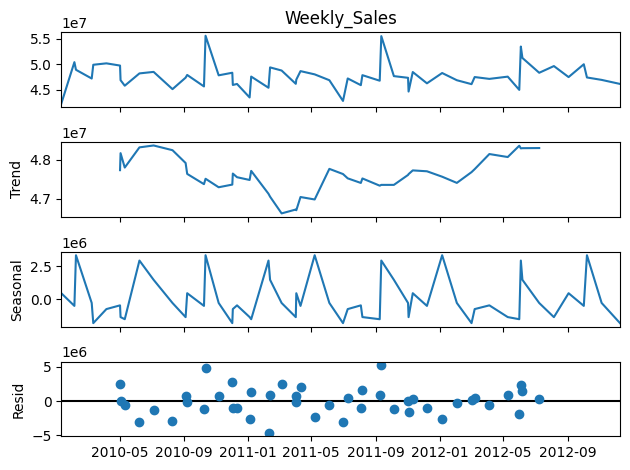

In [ ]:
print(sales_decomposition.plot())

# **Inference:**


*   **As we can see in the trend component there is seasonal spikes from 2010-09th month upto 2011-01, then after again in 2011-09th month to 2012-01 there is a seacond seasonal spike, but in 2012 year there is no that much spike.**
*   **Its winter season, and the Temperature may impact the sales, but we will cross check this guess.**


Figure(640x480)


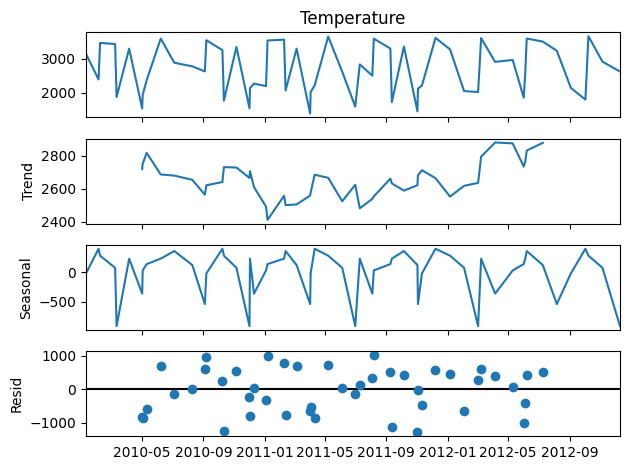

In [ ]:
print(Temperature_decomposition.plot())

*   **Regarding the Temperature data, a seasonal downward trend is observed starting from September 2010 until January 2011. Subsequently, there's a gradual increase. However, from September 2011, temperatures start to decline again.**
*   **In the Weekly Sales Data, there is a noticeable increase in sales starting from September 2010, followed by a seasonal upward trend until January 2011. Afterward, the sales stabilize, eventually transitioning to a downward trend. This pattern is repeated from September 2011 to January 2012.**
*   **In summary, there appears to be an inverse relationship between Temperature and Weekly Sales. When temperatures decrease, weekly sales tend to rise, and vice versa. This inverse correlation is evident from September 2011 to January 2012, as well as from September 2011 to January 2012.**



**c. Does temperature affect the weekly sales in any manner?**

In [ ]:
df_temp_sales = df.groupby(['Date','Temperature'])['Weekly_Sales'].sum().reset_index()

In [ ]:
df_temp_sales_correlation =df_temp_sales.corr()

<Axes: >

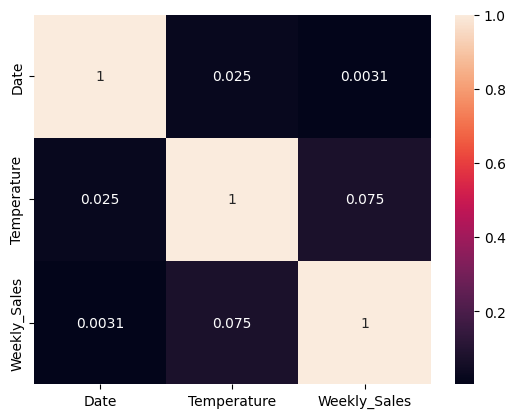

In [ ]:
sns.heatmap(df_temp_sales_correlation,annot=True)

**Inference:**


*   **As we guess there is a negatively correlation between the temperature and weekly sales.**
*   **Yes there is a negative correlation and the temperature is affecting the weekly sales.**

**Inference:**


*   **As we guess there is a negatively correlation between the temperature and weekly sales.**


In [ ]:
df_cpi_sales = df.groupby(['Date','CPI'])['Weekly_Sales'].sum().reset_index()

In [ ]:
df_cpi_sales_correlation =df_cpi_sales.corr()

<Axes: >

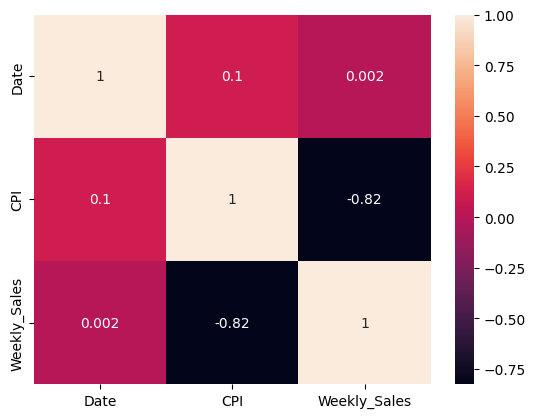

In [ ]:
sns.heatmap(df_cpi_sales_correlation,annot=True)

**Inference:**


*   **There is a negative correlation between the CPI and weekly sales.**
*   **Yes there is a negative correlation and the CPI is affecting the Weekly Sales.**
*   **We can see that in below graph as well. when the CPI increasing the sales are down.**


<Axes: xlabel='CPI_cat', ylabel='Weekly_Sales'>

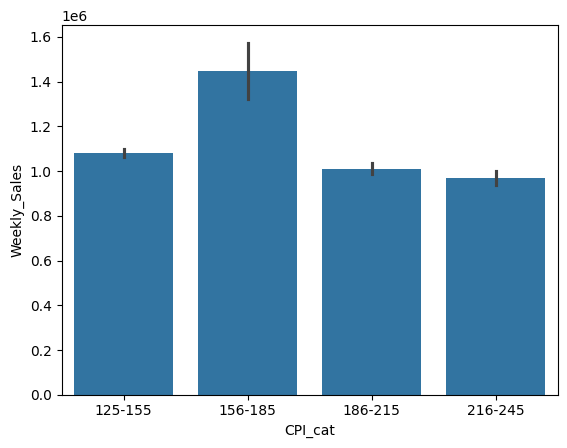

In [ ]:
sns.barplot(x=df['CPI_cat'],y=df['Weekly_Sales'])

**e. Top performing stores according to the historical data.**

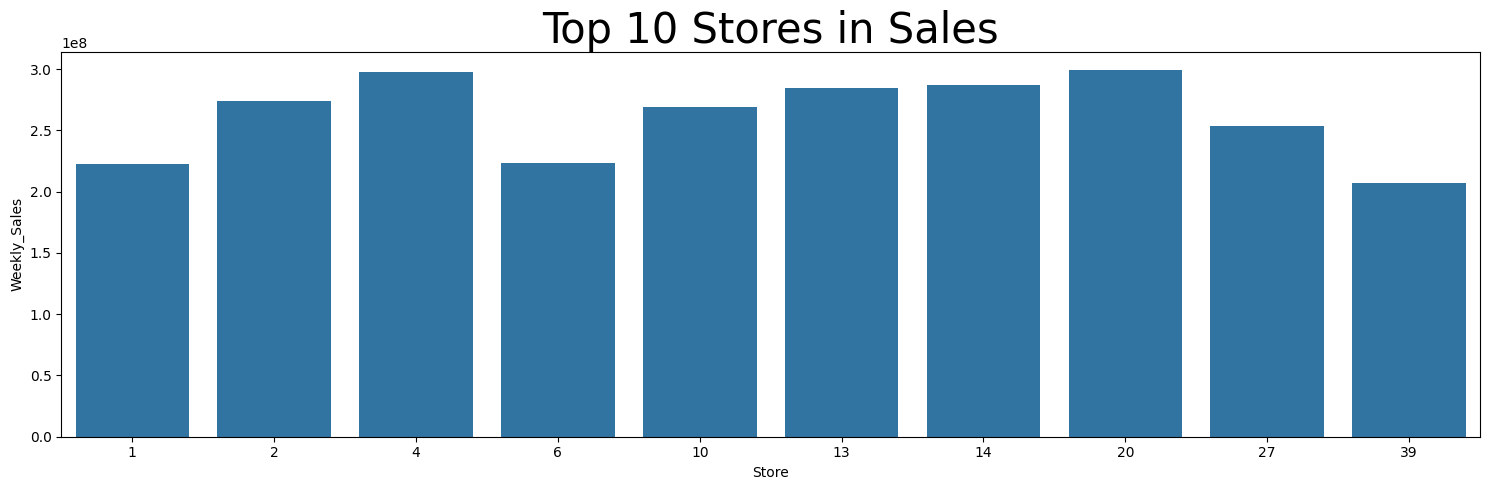

In [ ]:
# plotting the top 10 stores:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=top_10_Sale_Store)
plt.title('Top 10 Stores in Sales',fontsize=30)
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.tight_layout()
plt.show()

**Inference:**


*   **The stores 4,20,14 is having the highest sales in top 10 stores segment.**
*   **The stores 6,39 is having the lowest sales in top 10 stores segment list item.**

**f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.**

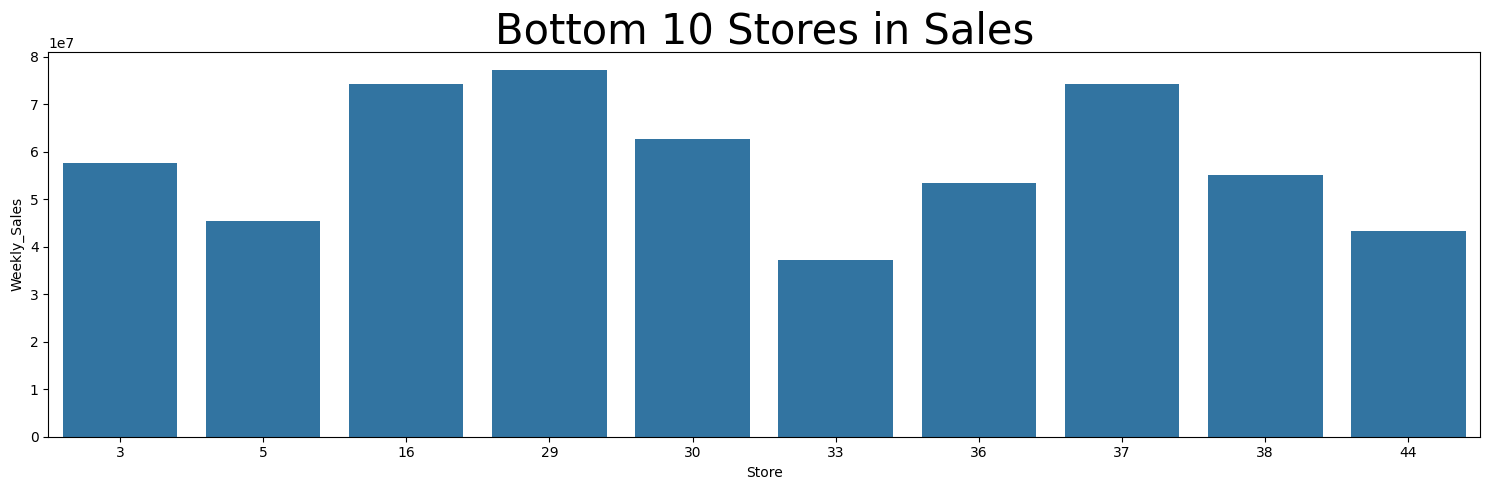

In [ ]:
# plotting the Bottom 10 stores:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=Bottom_10_Sale_Store)
plt.title('Bottom 10 Stores in Sales',fontsize=30)
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.tight_layout()
plt.show()

**Inference:**


*   **The stores 29,16,37 is having the highest sales in bottom 10 stores segment.**
*   **The stores 33,44 is having the highest sales in bottom 10 stores segment.**


**Finding the significance difference**

*   **For getting the signficant difference between top and bottom performing stores, using t-test weather it has a significant difference or not.**

In [ ]:
# Importing the ttest_ind.. this helps us to compare mean between the two indipendent groups:

from scipy.stats import ttest_ind
top_sales = top_10_Sale_Store['Weekly_Sales']
worst_sales = Bottom_10_Sale_Store['Weekly_Sales']
t_statistic, p_value = ttest_ind(top_sales, worst_sales)

In [ ]:
# Interpret results:
if p_value < 0.05:
    print("There is a significant difference between top-performing and worst-performing stores.")
    print(f"P-value: {p_value}")
else:
    print("There is no significant difference between top-performing and worst-performing stores.")
    print(f"P-value: {p_value}")

There is a significant difference between top-performing and worst-performing stores.
P-value: 7.079291347377579e-13


In [ ]:
mean_difference = top_sales.mean() - worst_sales.mean()
print("Significant Mean difference value between groups:", mean_difference)

Significant Mean difference value between groups: 203807667.66124997


# **Forecasting sales for wallmart stores using ARIMA Model**

In [ ]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1        NaT    1611968.17             0        39.93       2.514   
3      1        NaT    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Unemployment_Rate_Cat Temp_Category  \
0  211.096358         8.106                      3         26-50   
1  211.242170         8.106                      3         26-50   
2  211.289143         8.106                      3         26-50   
3  211.319643         8.106                      3         26-50   
4  211.350143         8.106                      3         26-50   

  Fuel_Price_Cat  CPI_cat Quarters  
0          2.6-3  186-215   2010Q2  
1          2.6-3  186-215   2010Q4  
2          2.6-3  186-215      NaT  
3          2.6-3  186-215      NaT  
4          2.6-3  186-215   2010Q2

In [ ]:
# Excluding all the varibales and considering the date and sales data for model building:
df_stores_sales =df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [ ]:
# Setting Date column as an Index:
df_stores_sales.set_index('Date',inplace=True)

In [ ]:
# Importing the adfuller for check the data stationality:
from statsmodels.tsa.stattools import adfuller

# check for stationality
def adf_test(series, title=''):

    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series,autolag='AIC')
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val

    # .to_string() removes the line "dtype: float64"
    print(out.to_string())

    if result[1] <= 0.05:

        print("Rejects the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary.")

In [ ]:
adf_test(df_stores_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -7.863730e+00
p-value                 5.201278e-12
# lags used             0.000000e+00
# observations          5.600000e+01
critical value (1%)    -3.552928e+00
critical value (5%)    -2.914731e+00
critical value (10%)   -2.595137e+00
Rejects the null hypothesis
Data has no unit root and is stationary


In [ ]:
# Importing the seasonal decompose for break down the components of the time series data:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)

Figure(640x480)


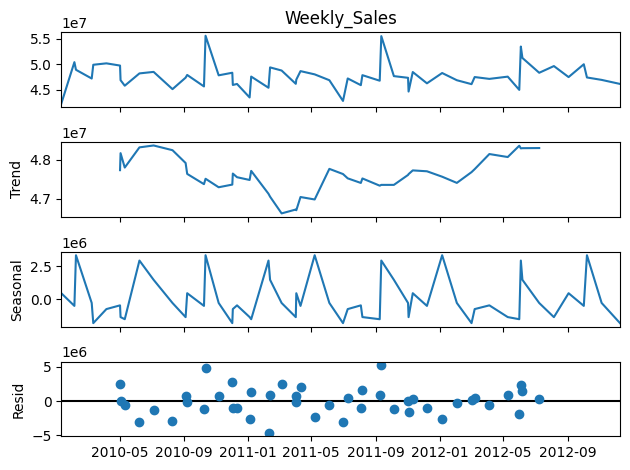

In [ ]:
print(decomposition.plot())

In [ ]:
# Creating the Rolling mean:
mean1=df_stores_sales.rolling(window=10).mean()

# Creating the Rolling standard deviation:
std1=df_stores_sales.rolling(window=10).std()

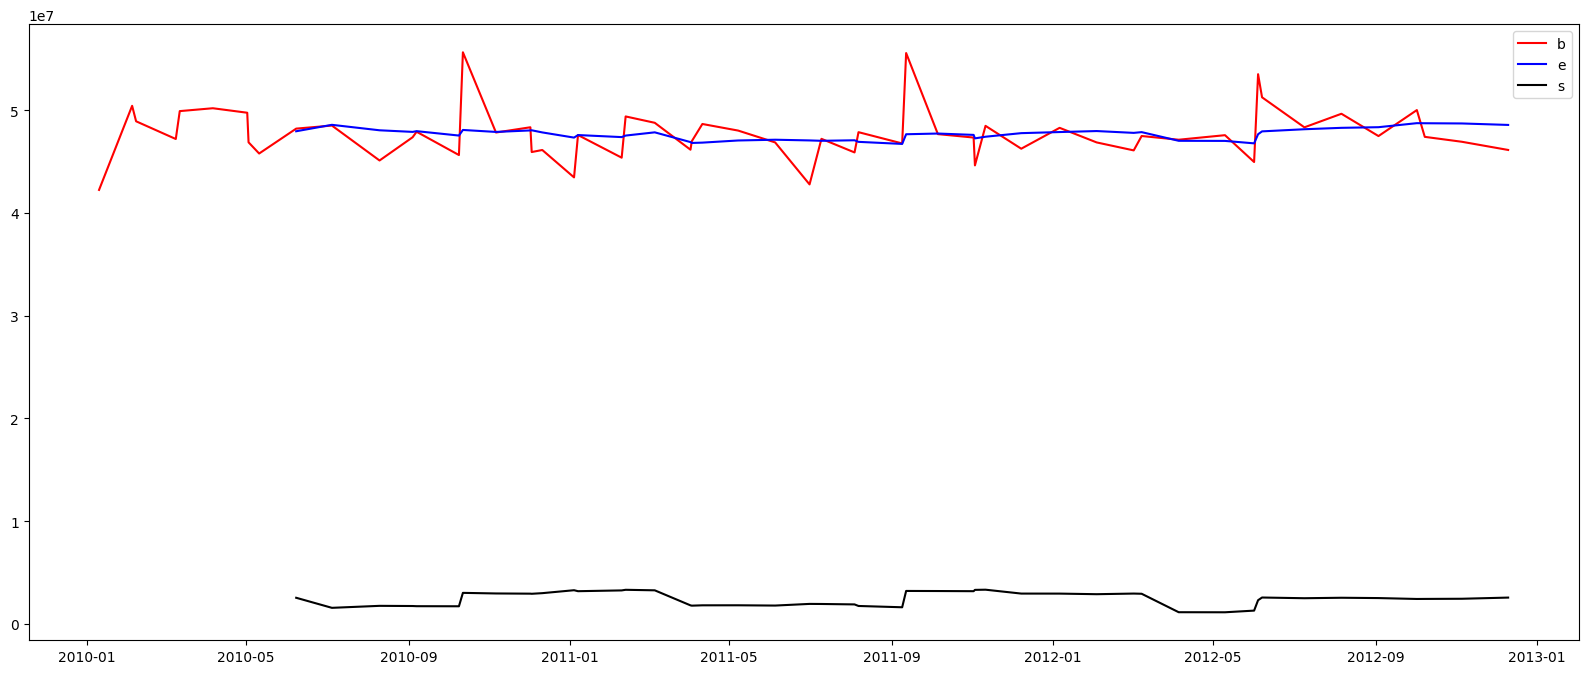

In [ ]:
# plotting the rolling mean and standard deviation with respect to weekly sales
plt.figure(figsize=(20,8))
orig=plt.plot(df_stores_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

**Inference:**

*   **Mean and sales are almost close, but mean is not capturing the seasonal spikes.**


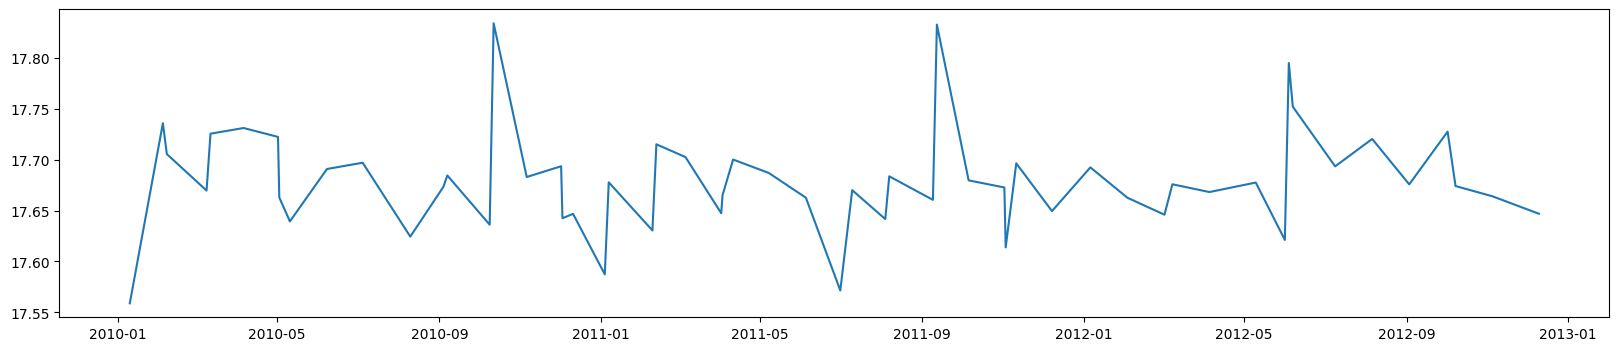

In [ ]:
# Applying log transformation to the data:
df_log = np.log(df_stores_sales)
plt.figure(figsize=(20,4))
plt.plot(df_log)

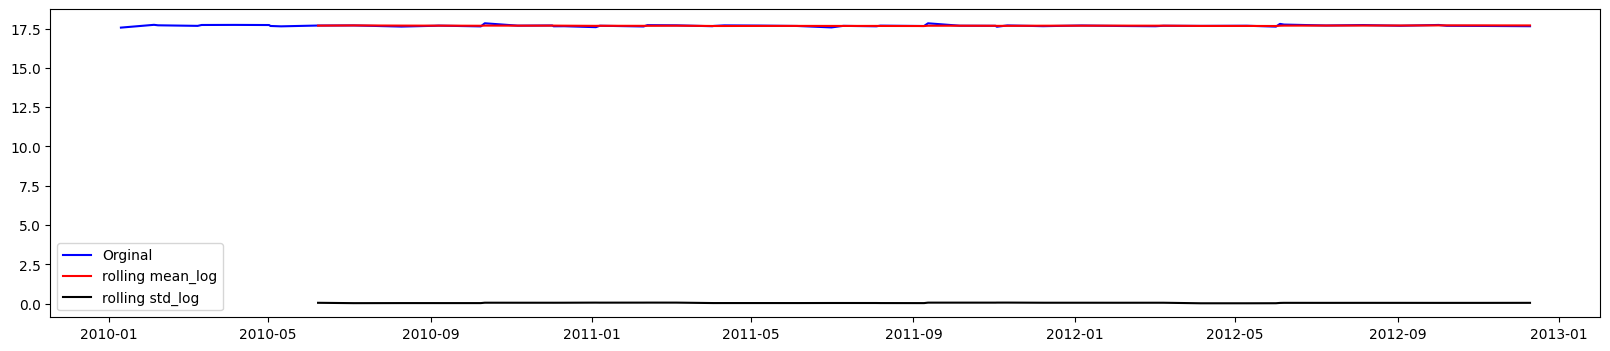

In [ ]:
# After log transformation to the data, comparing actual data with rolling mean and standard deviation, which are close:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Subtracting log data and mean log data,
# Can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-01-10           NaN
2010-02-04           NaN
2010-02-07           NaN
2010-03-09           NaN
2010-03-12           NaN
2010-04-06           NaN
2010-05-02           NaN
2010-05-03           NaN
2010-05-11           NaN
2010-06-08      0.006662
2010-07-05     -0.000997
2010-08-10     -0.062528
2010-09-04     -0.010362
2010-09-07     -0.000629
2010-10-09     -0.040119
2010-10-12      0.147729
2010-11-06      0.000442
2010-12-02      0.007973
2010-12-03     -0.043512
2010-12-11     -0.034768

In [ ]:
# Dropping null values:
df_new.dropna(inplace = True)

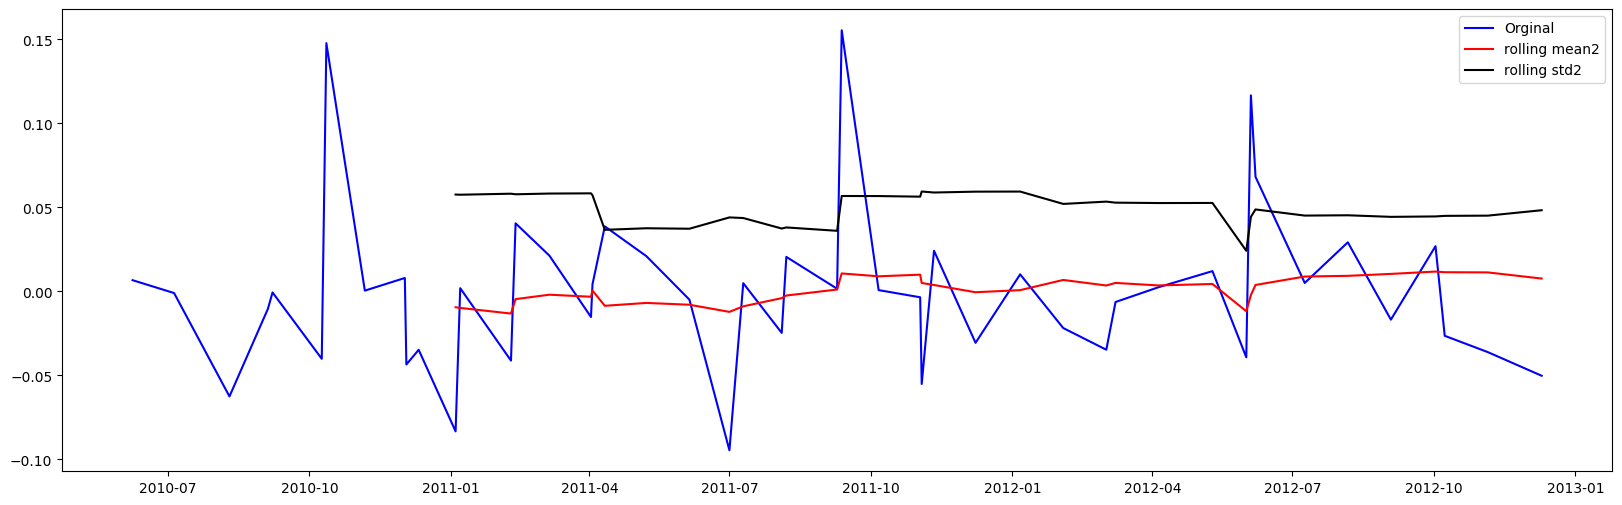

In [ ]:
# After log transformation checking rolling statistics such as mean and standard deviation:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [ ]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic      -4.214727
p-value                  0.000622
# lags used              4.000000
# observations          43.000000
critical value (1%)     -3.592504
critical value (5%)     -2.931550
critical value (10%)    -2.604066
Rejects the null hypothesis
Data has no unit root and is stationary


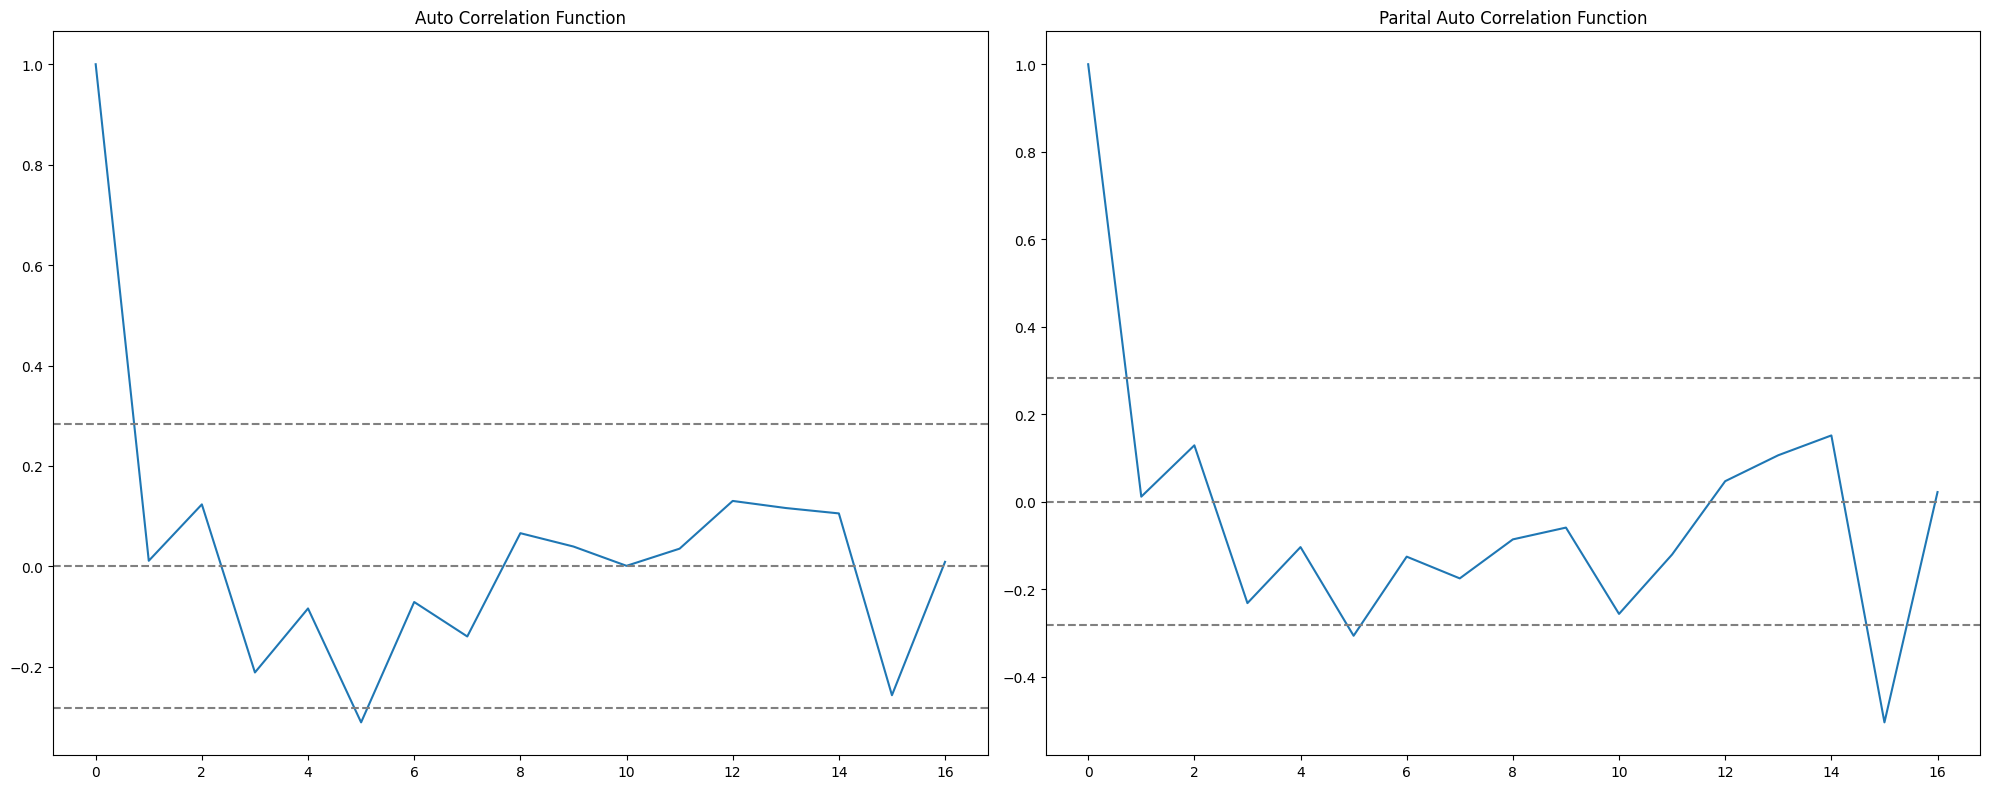

In [ ]:
# plotting ACF and PACF plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

**Inference:**
*  **we got out P value as 5 and q value as 3**

In [ ]:
# Buliding the ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df_new, order=(5, 1, 3))
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

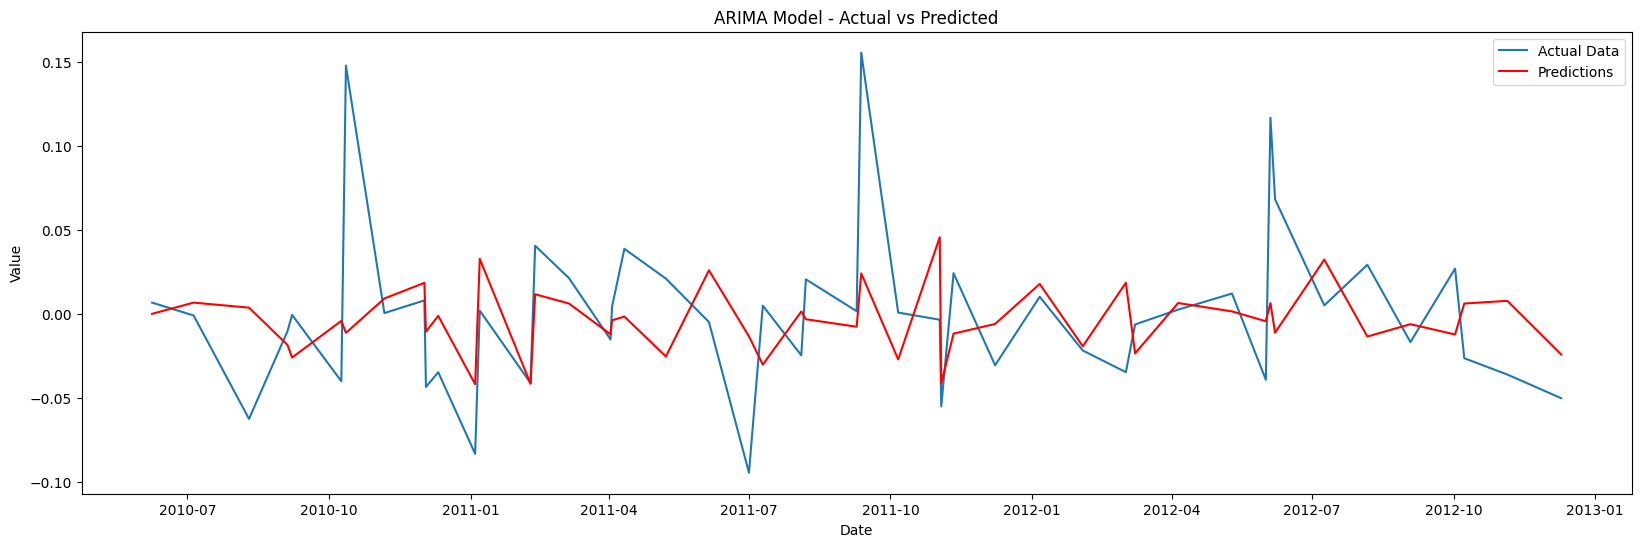

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error{mse}')

Mean Squared_Error0.0021923955944419715


In [ ]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error{rmse}')

Root Mean Squared_Error0.046823024191544604


# **Store Wise Predictions**


**Store 1 Sales Forecast**

In [ ]:
# Creating a new data frame for store 1 sales forecast
store1_sales=df[df['Store']==1].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [ ]:
store1_sales.set_index('Date',inplace=True)

In [ ]:
adf_test(store1_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic      -3.394763
p-value                  0.011139
# lags used              1.000000
# observations          55.000000
critical value (1%)     -3.555273
critical value (5%)     -2.915731
critical value (10%)    -2.595670
Rejects the null hypothesis
Data has no unit root and is stationary


In [ ]:
# Importing seasonal decompose for break down the components of the time series data:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomposition=seasonal_decompose(store1_sales['Weekly_Sales'],period=13)


Figure(640x480)


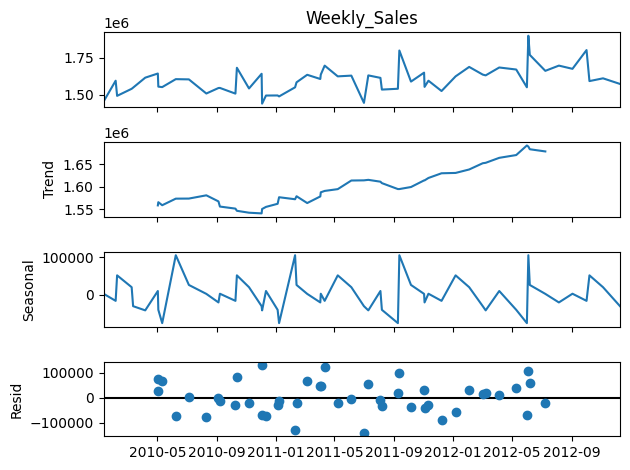

In [ ]:
print(decomposition.plot())

In [ ]:
mean1=store1_sales.rolling(window=10).mean()
std1=store1_sales.rolling(window=10).std()

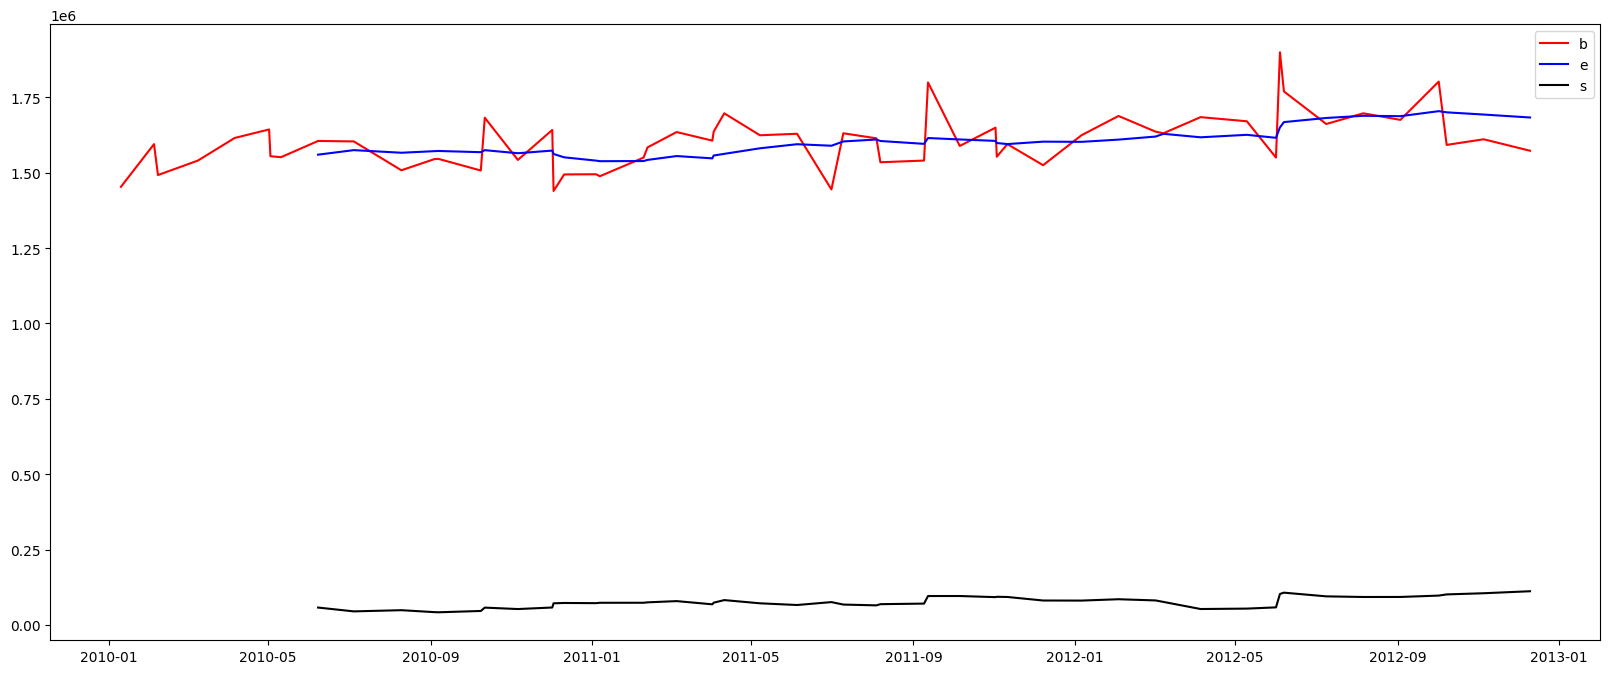

In [ ]:
# Plotting rolling mean:
plt.figure(figsize=(20,8))
orig=plt.plot(store1_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

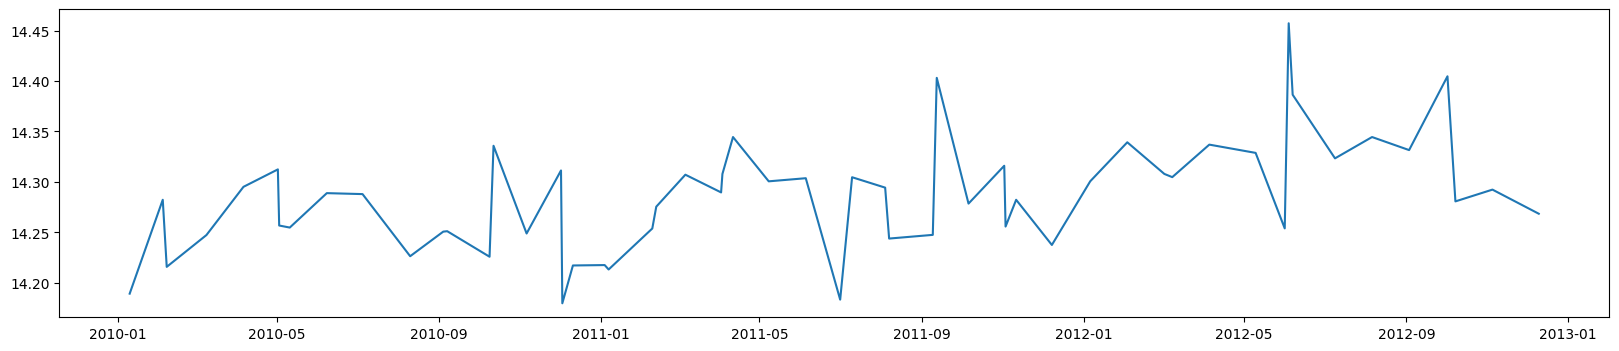

In [ ]:
df_log = np.log(store1_sales)
plt.figure(figsize=(20,4))
plt.plot(df_log)

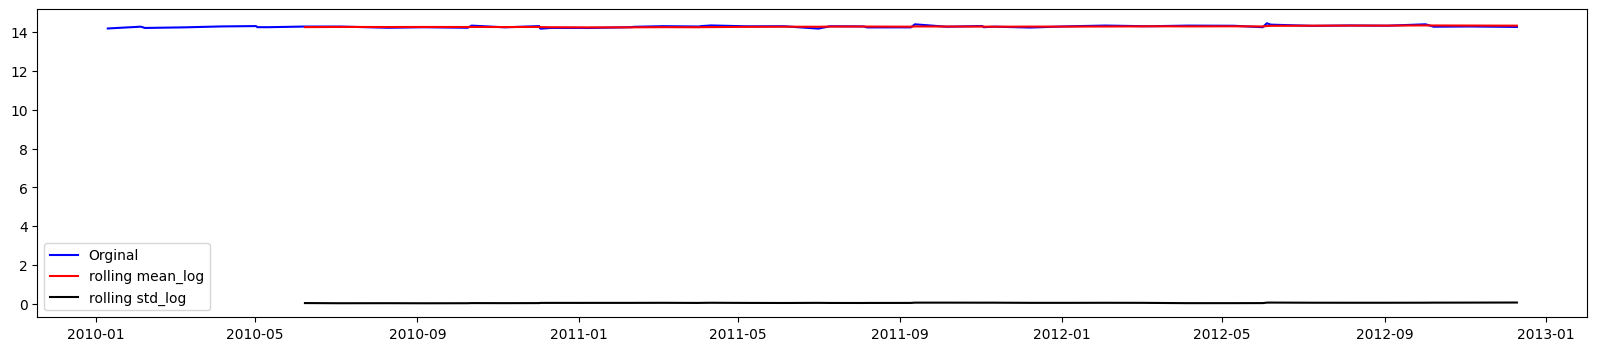

In [ ]:
# After log transformation to the data, comparing actual data with rolling mean and standard deviation:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# subtracting the log data and mean log data:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-01-10           NaN
2010-02-04           NaN
2010-02-07           NaN
2010-03-09           NaN
2010-03-12           NaN
2010-04-06           NaN
2010-05-02           NaN
2010-05-03           NaN
2010-05-11           NaN
2010-06-08      0.029361
2010-07-05      0.018542
2010-08-10     -0.037396
2010-09-04     -0.016535
2010-09-07     -0.016494
2010-10-09     -0.039130
2010-10-12      0.066723
2010-11-06     -0.013831
2010-12-02      0.043160
2010-12-03     -0.080905
2010-12-11     -0.036286

In [ ]:
df_new.dropna(inplace = True)

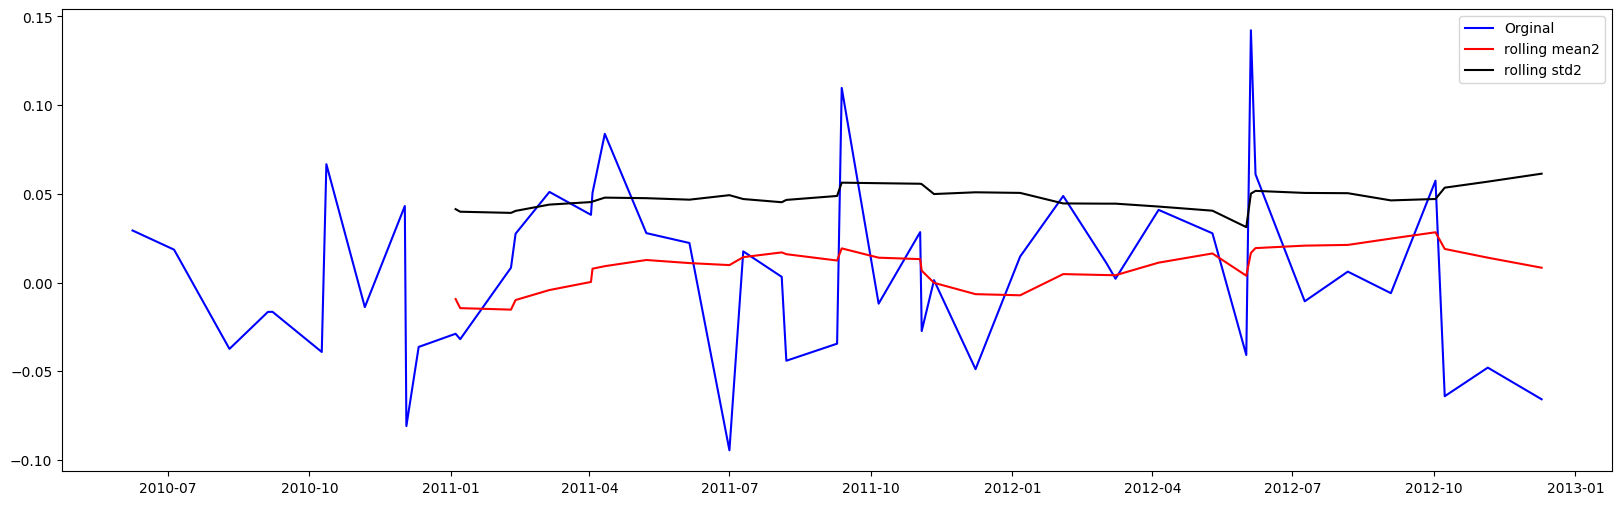

In [ ]:
# After log transformation checking rolling statistics such as mean and standard deviation:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [ ]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.193077e+00
p-value                 6.056390e-08
# lags used             0.000000e+00
# observations          4.700000e+01
critical value (1%)    -3.577848e+00
critical value (5%)    -2.925338e+00
critical value (10%)   -2.600774e+00
Rejects the null hypothesis
Data has no unit root and is stationary


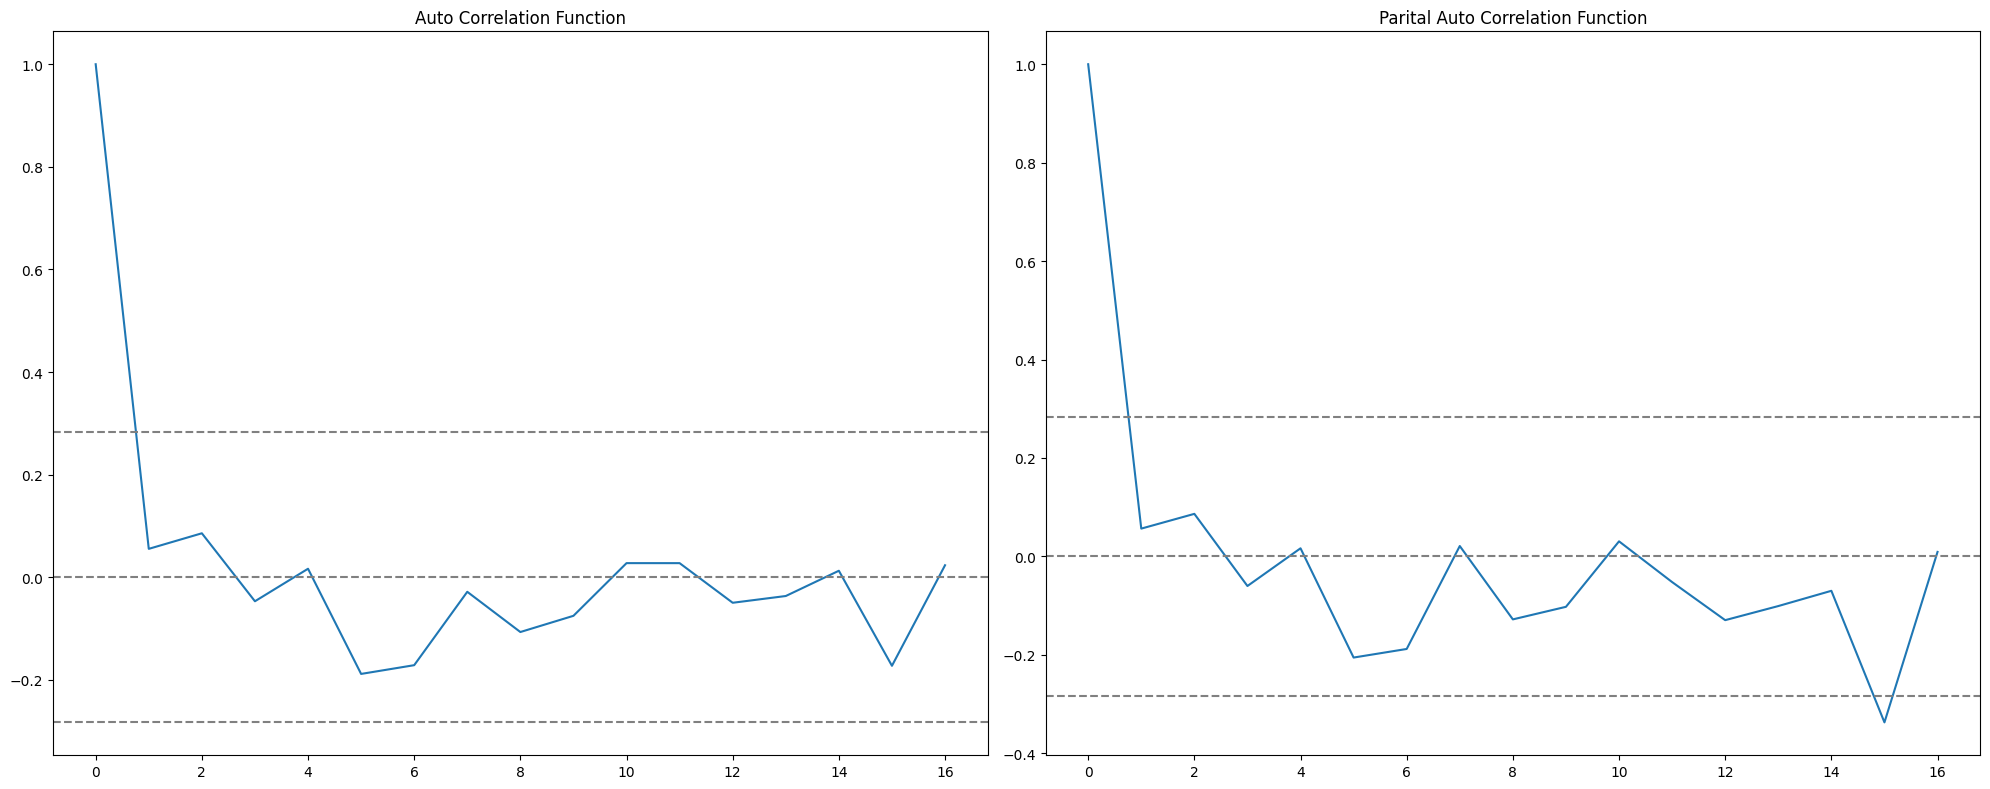

In [ ]:
# plotting the ACF and PACF plot to identify the values of P AND Q:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [ ]:
# Got pdq values as 2,2,2
p, d, q = 2, 1, 2
model = ARIMA(df_new, order=(p, d, q)) # fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


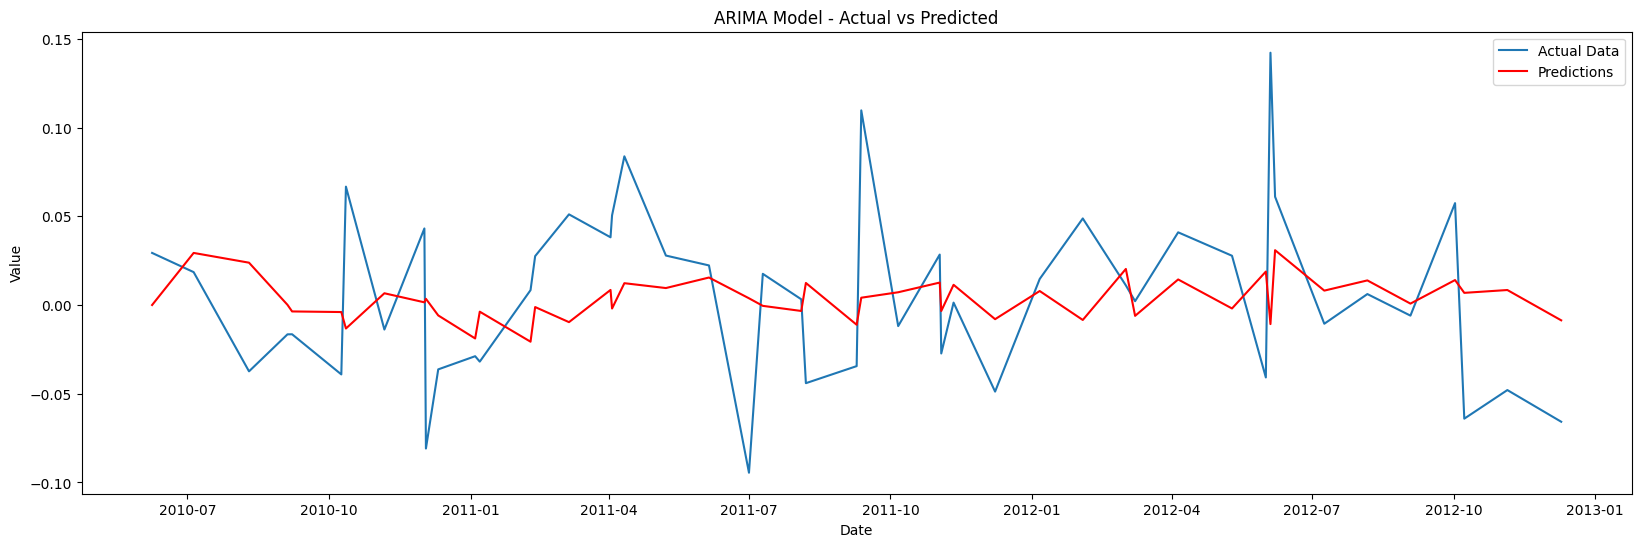

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.0023547973572199386


In [ ]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.04852625430856928


In [ ]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Here, need to find dataset end date to continue from there to next 12 weeks:
end_date_actual_data = '2012-12-10'

# Generate dates for the forecasted period
# with the help of datetime function, creating a time span of 12 weeks:

forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [ ]:
forecast_dates

DatetimeIndex(['2012-12-16', '2012-12-23', '2012-12-30', '2013-01-06',
               '2013-01-13', '2013-01-20', '2013-01-27', '2013-02-03',
               '2013-02-10', '2013-02-17', '2013-02-24', '2013-03-03'],
              dtype='datetime64[ns]', freq='W-SUN')

In [ ]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [ ]:
forecast_df.set_index('Date',inplace=True)

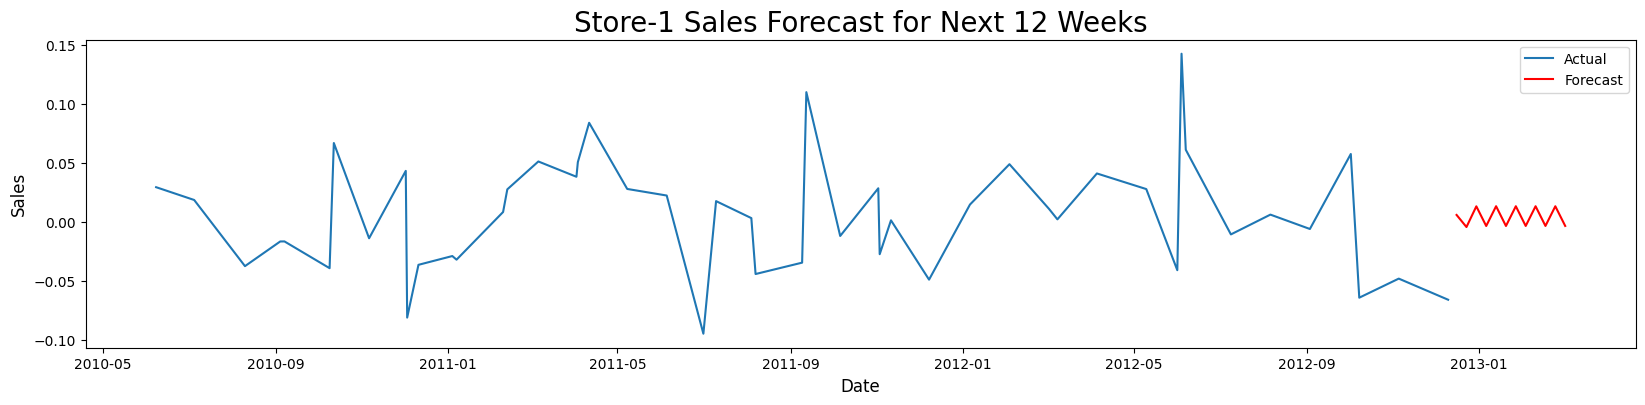

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-1 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [ ]:
# Checking the Model Accuracy once again
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.04852625430856928


**Store 6 Sales Forecast**

In [ ]:
# Creating new data frame for store 6 sales forecast:

store6_sales=df[df['Store']==6].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [ ]:
store6_sales.set_index('Date',inplace=True)

In [ ]:
# Checking the pvalue and data stationality:

adf_test(store6_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -7.516325e+00
p-value                 3.894637e-11
# lags used             0.000000e+00
# observations          5.600000e+01
critical value (1%)    -3.552928e+00
critical value (5%)    -2.914731e+00
critical value (10%)   -2.595137e+00
Rejects the null hypothesis
Data has no unit root and is stationary


In [ ]:
decomposition=seasonal_decompose(store6_sales['Weekly_Sales'],period=13)

Figure(640x480)


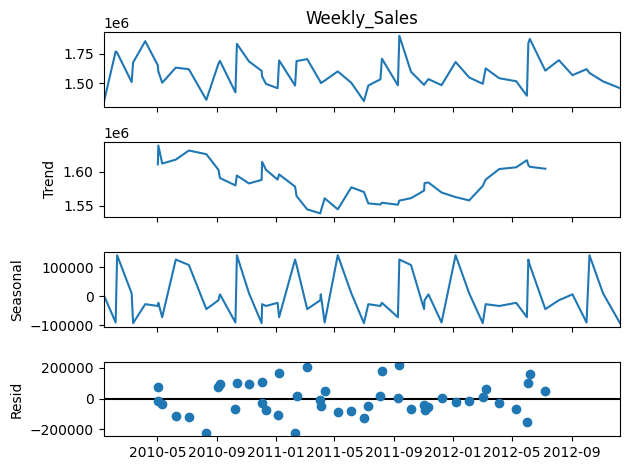

In [ ]:
print(decomposition.plot())

In [ ]:
mean1=store6_sales.rolling(window=10).mean()
std1=store6_sales.rolling(window=10).std()

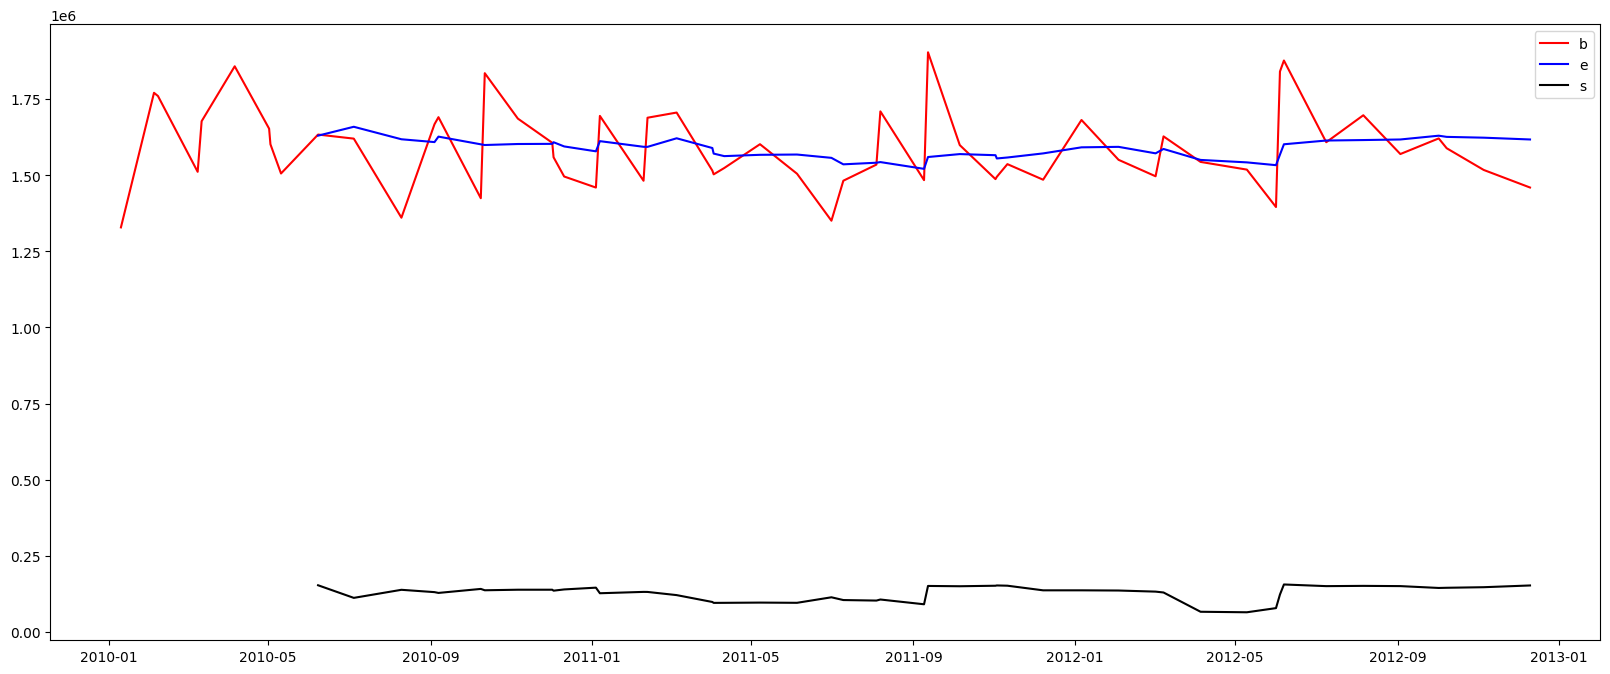

In [ ]:
# plotting the rolling mean:
plt.figure(figsize=(20,8))
orig=plt.plot(store6_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

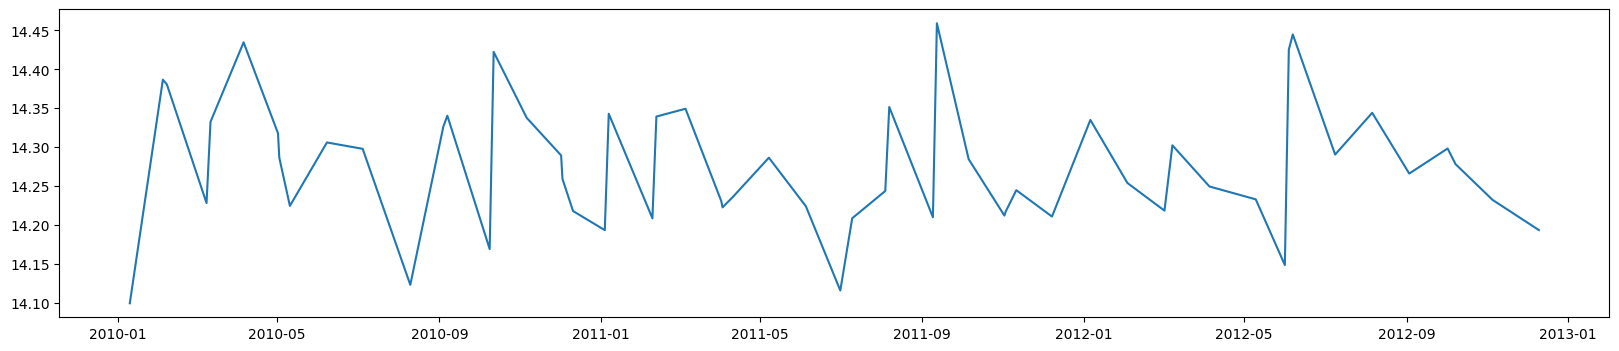

In [ ]:
# Applying log transformation:

df_log = np.log(store6_sales)
plt.figure(figsize=(20,4))
plt.plot(df_log)

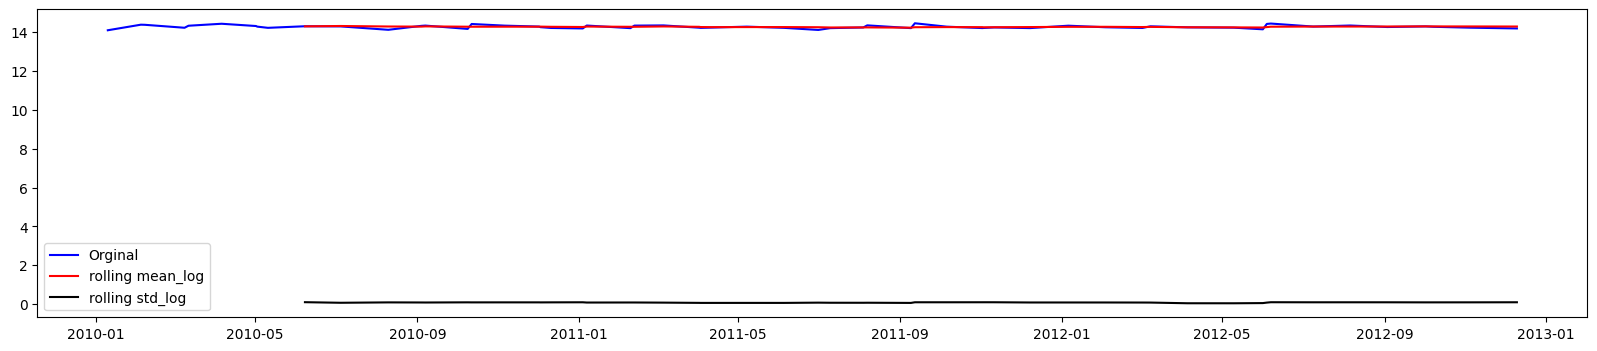

In [ ]:
# After log transformation to the data, comparing actual data with rolling mean and standard deviation:

mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# subtracting the log data and mean log data:

df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-01-10           NaN
2010-02-04           NaN
2010-02-07           NaN
2010-03-09           NaN
2010-03-12           NaN
2010-04-06           NaN
2010-05-02           NaN
2010-05-03           NaN
2010-05-11           NaN
2010-06-08      0.006348
2010-07-05     -0.021677
2010-08-10     -0.169990
2010-09-04      0.038831
2010-09-07      0.041394
2010-10-09     -0.113553
2010-10-12      0.140947
2010-11-06      0.054220
2010-12-02      0.005683
2010-12-03     -0.027910
2010-12-11     -0.060419

In [ ]:
df_new.dropna(inplace = True)

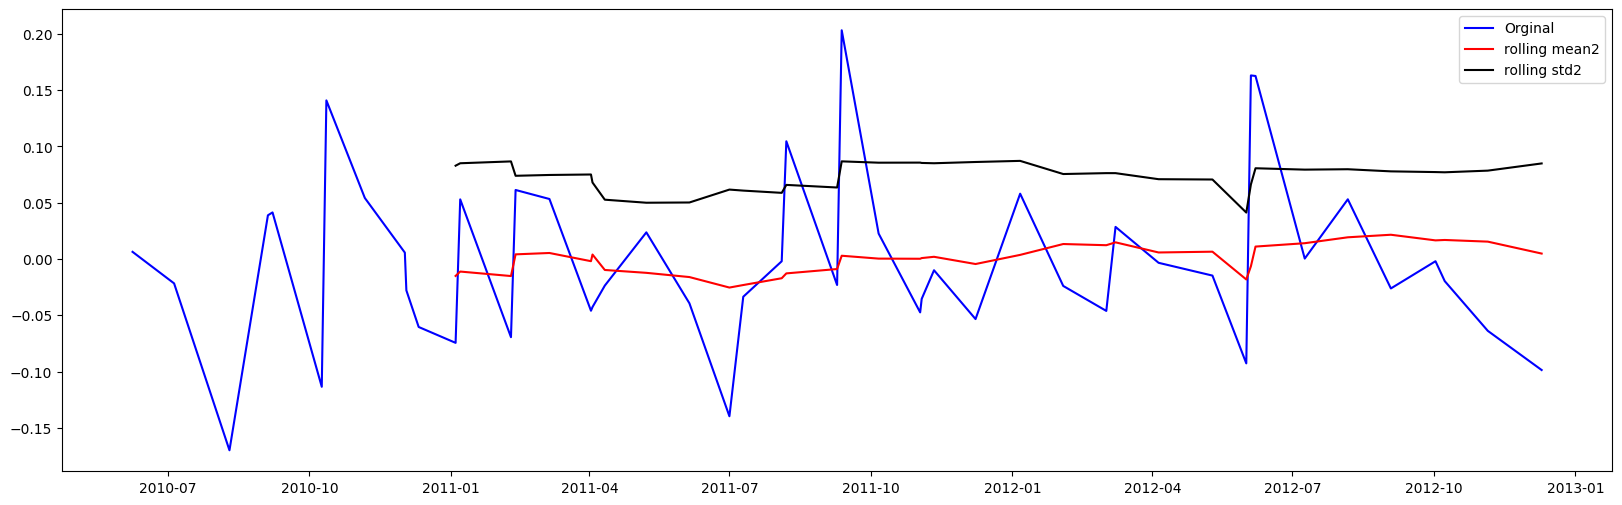

In [ ]:
# After log transformation checking rolling statistics such as mean and standard deviation:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [ ]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.452131e+00
p-value                 1.514321e-08
# lags used             0.000000e+00
# observations          4.700000e+01
critical value (1%)    -3.577848e+00
critical value (5%)    -2.925338e+00
critical value (10%)   -2.600774e+00
Rejects the null hypothesis
Data has no unit root and is stationary


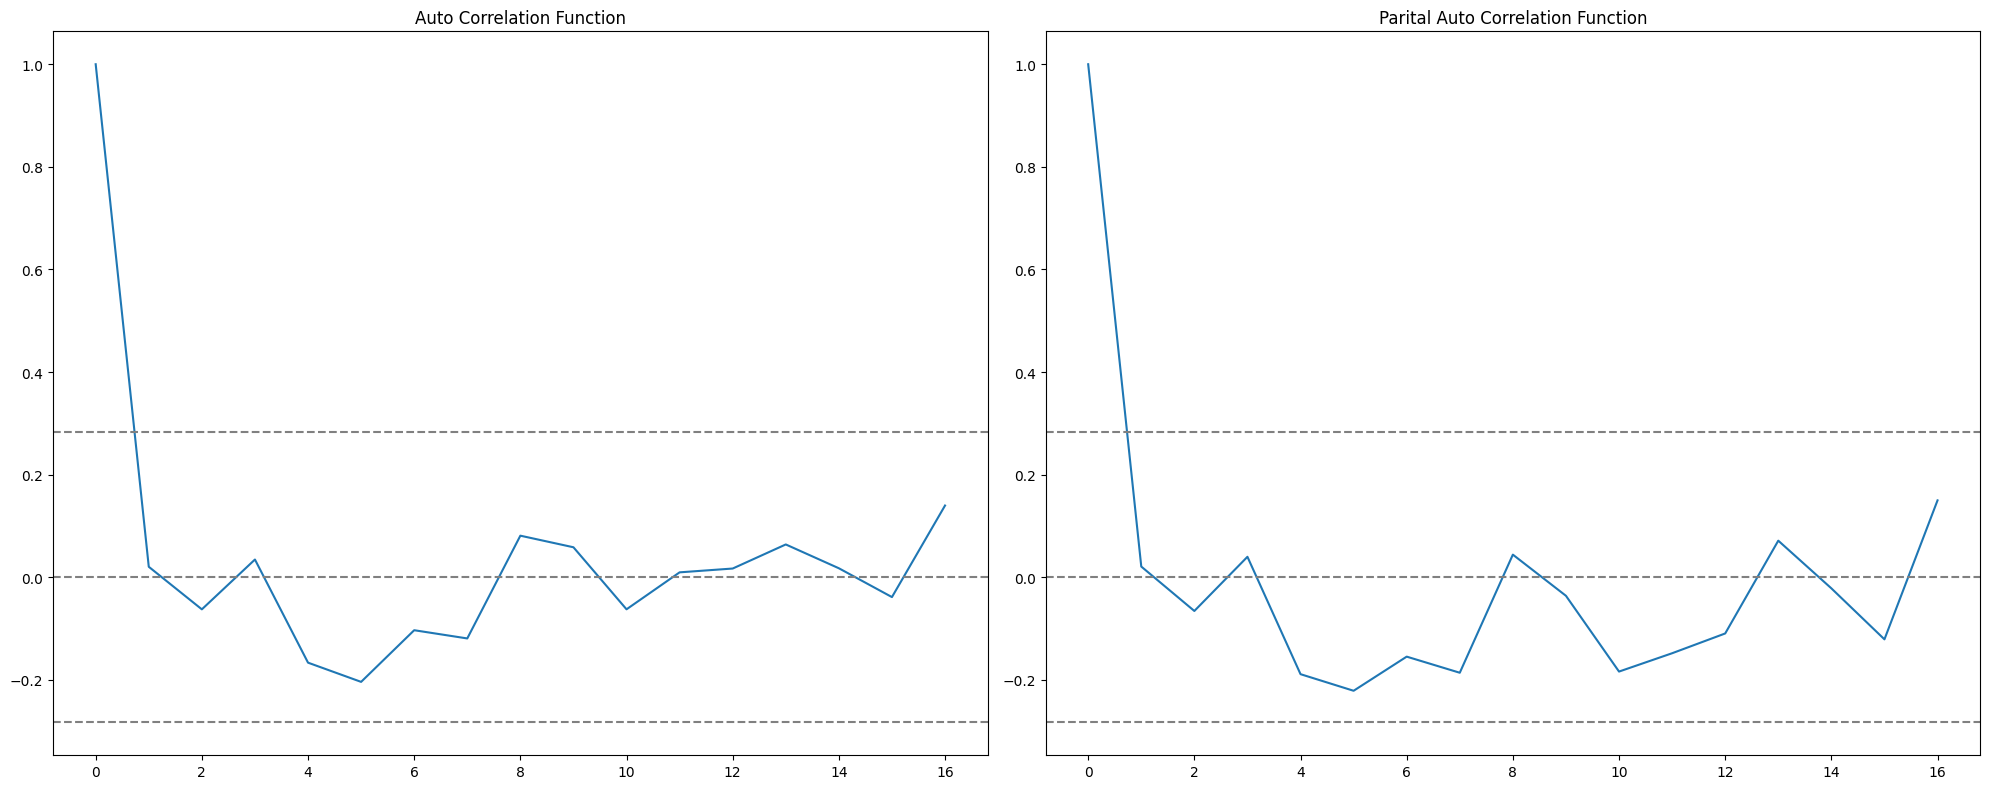

In [ ]:
# Plotting the ACF and PACF plot to identify the values of P AND Q:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [ ]:
#pdq values are 4,1,3

p, d, q = 4, 1, 3
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

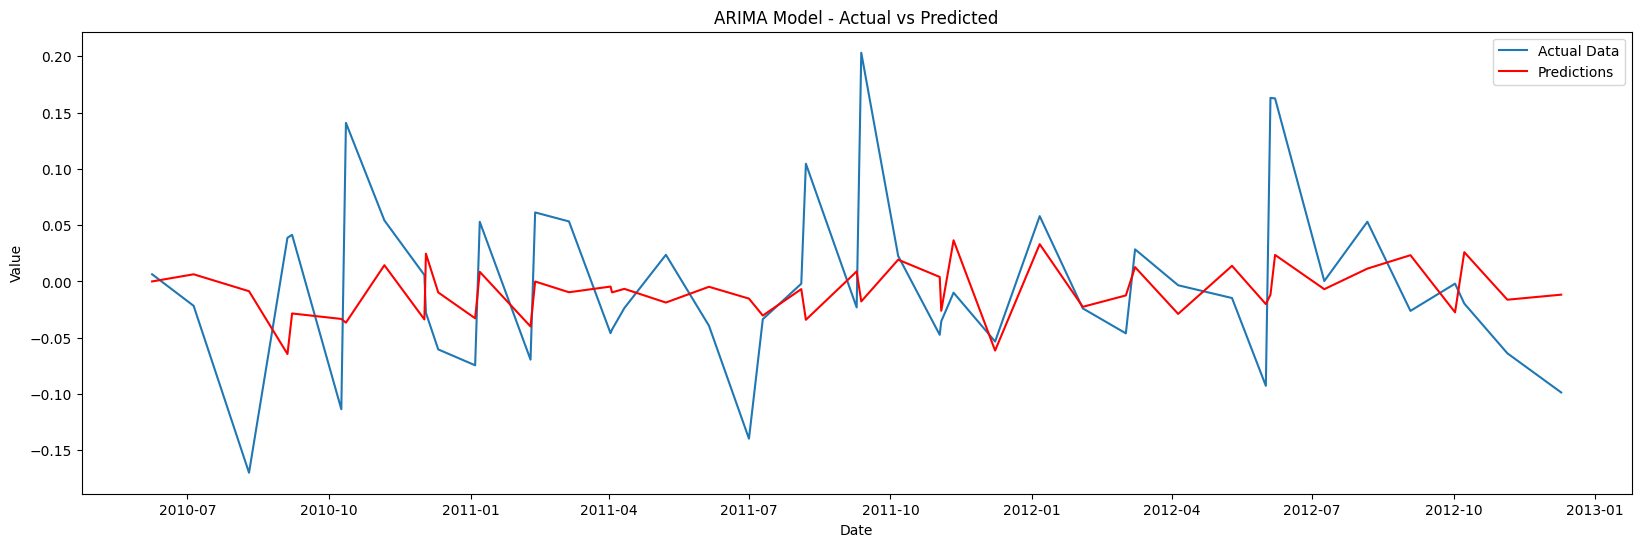

In [ ]:
# Plotting the actual and predictions
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# Checking accuracy of the model with mse:

mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.005674086276270589


In [ ]:
# Checking accuracy of the model with rmse:

rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.07532653102506838


In [ ]:
# Forcasting for the next 12 weeks:

forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Here finding dataset end date, so that to continue from there to next 12 weeks:

end_date_actual_data = '2012-12-10'

# Generate dates for the forecasted period
# with the help of datetime function iam creating a time span of 12 weeks:

forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [ ]:
# Creating a dataframe with forecasted sales and next 12 weeks dates:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [ ]:
forecast_df.set_index('Date',inplace=True)

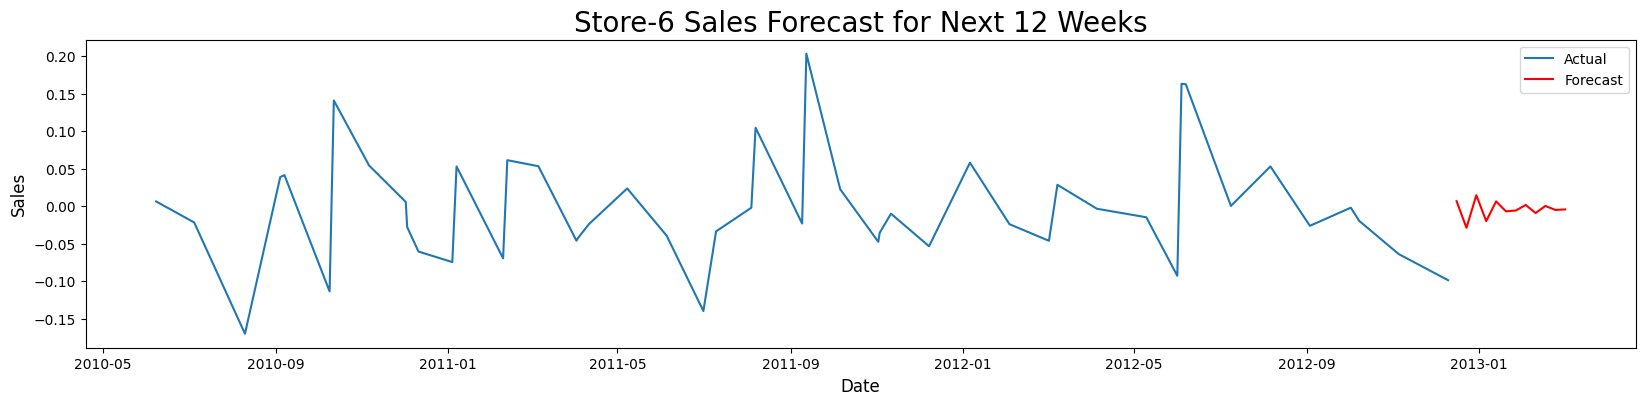

In [ ]:
plt.figure(figsize=(20, 4))# plotting the actual and forcaste sales for next 12 weeks
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-6 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [ ]:
# Checking the Model accuracy once again:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error: {rmse}')

Root Mean Squared_Error: 0.07532653102506838


**Store 11th Sales Prediction**

In [ ]:
# Creating new data frame for store 11 sales forecast:
store11_sales=df[df['Store']==11].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [ ]:
# Creating new data frame for store 11 sales forecast:
store11_sales=df[df['Store']==11].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [ ]:
# Checking the pvalue and data stationality:

adf_test(store11_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -8.420126e+00
p-value                 1.993964e-13
# lags used             0.000000e+00
# observations          5.600000e+01
critical value (1%)    -3.552928e+00
critical value (5%)    -2.914731e+00
critical value (10%)   -2.595137e+00
Rejects the null hypothesis
Data has no unit root and is stationary


In [ ]:
decomposition=seasonal_decompose(store11_sales['Weekly_Sales'],period=13)

Figure(640x480)


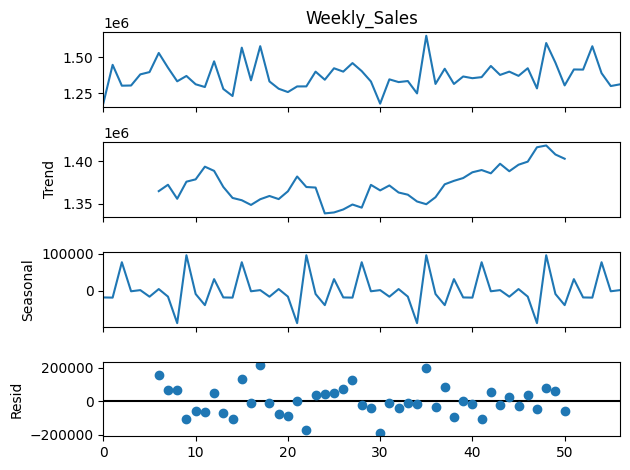

In [ ]:
print(decomposition.plot())

In [ ]:
# Creating the Rolling mean and sd:

mean1=store11_sales.rolling(window=10).mean()
std1=store11_sales.rolling(window=10).std()

DataError: Cannot aggregate non-numeric type: datetime64[ns]

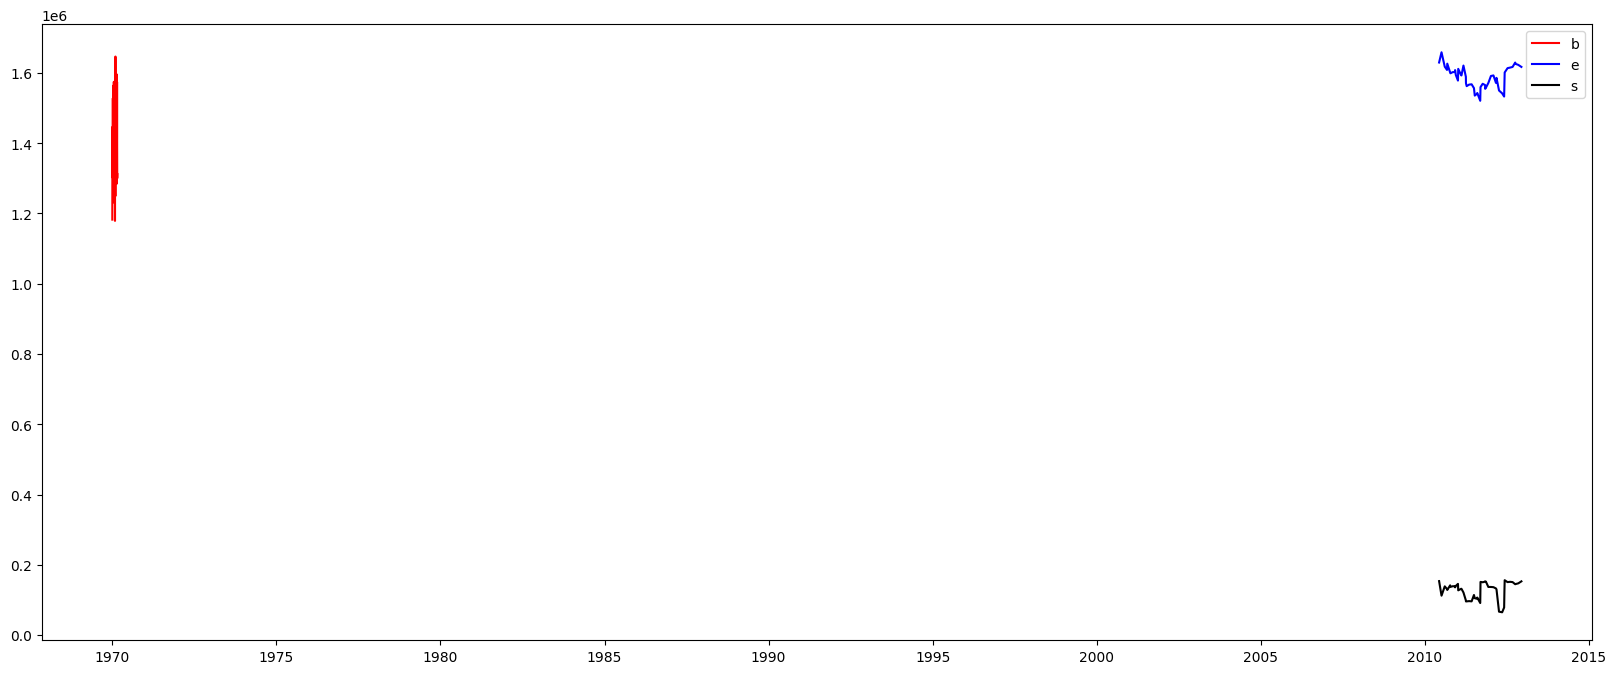

In [ ]:
# plotting the rolling mean
plt.figure(figsize=(20,8))
orig=plt.plot(store11_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

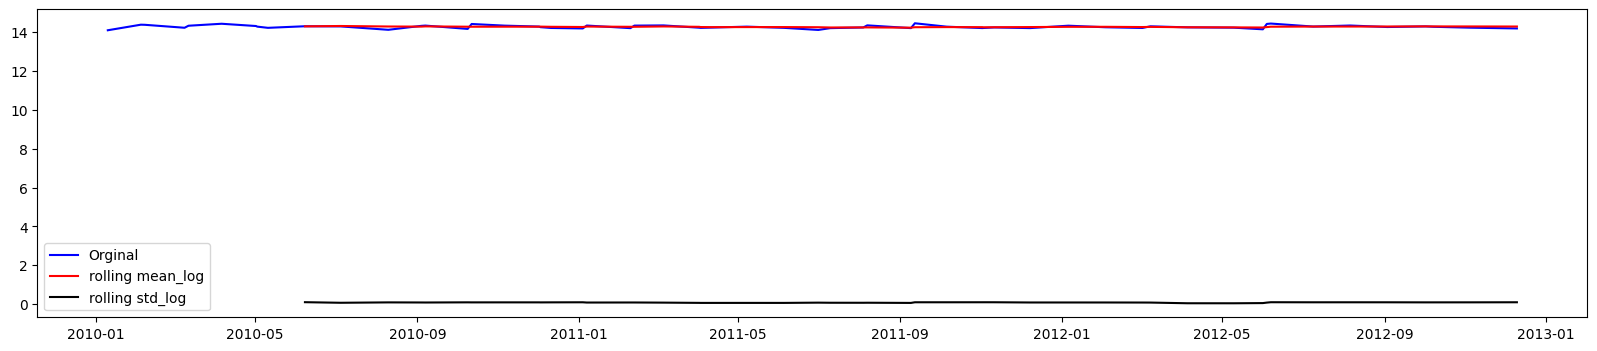

In [ ]:
# After log transformation to the data, comparing actual data with rolling mean and standard deviation:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Subtracting log data and mean log data:

df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-01-10           NaN
2010-02-04           NaN
2010-02-07           NaN
2010-03-09           NaN
2010-03-12           NaN
2010-04-06           NaN
2010-05-02           NaN
2010-05-03           NaN
2010-05-11           NaN
2010-06-08      0.006348
2010-07-05     -0.021677
2010-08-10     -0.169990
2010-09-04      0.038831
2010-09-07      0.041394
2010-10-09     -0.113553
2010-10-12      0.140947
2010-11-06      0.054220
2010-12-02      0.005683
2010-12-03     -0.027910
2010-12-11     -0.060419

In [ ]:
df_new.dropna(inplace = True)

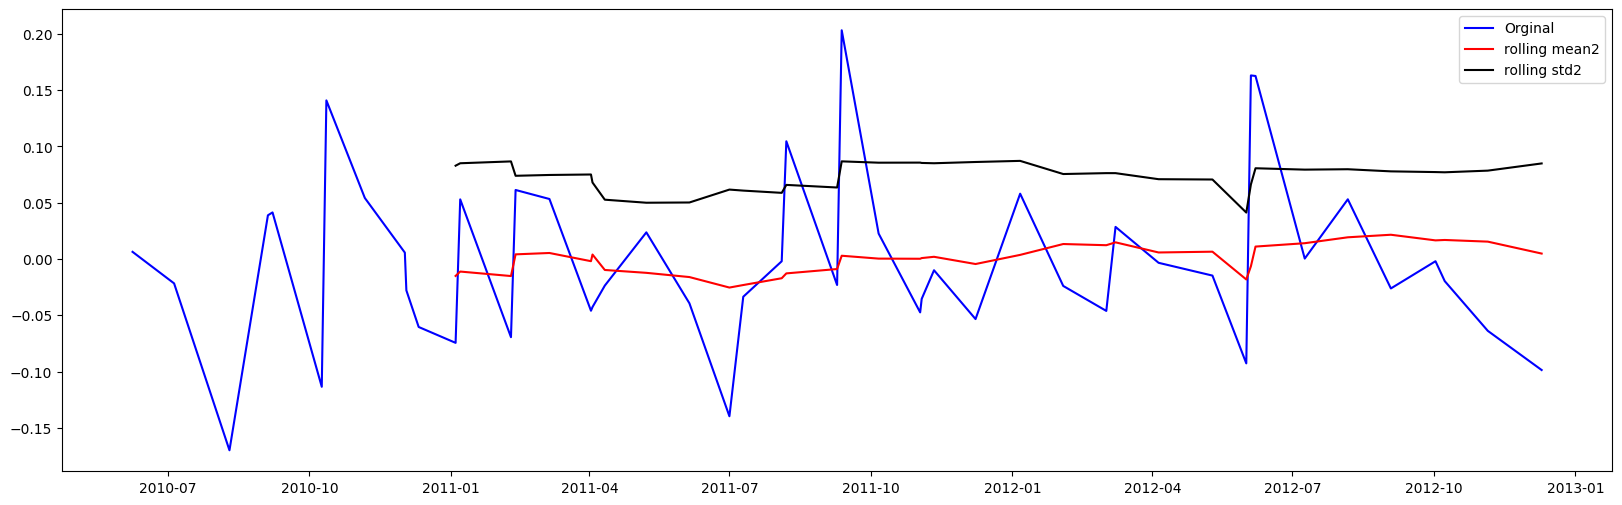

In [ ]:
# After log transformation checking rolling statistics such as mean and standard deviation:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [ ]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.452131e+00
p-value                 1.514321e-08
# lags used             0.000000e+00
# observations          4.700000e+01
critical value (1%)    -3.577848e+00
critical value (5%)    -2.925338e+00
critical value (10%)   -2.600774e+00
Rejects the null hypothesis
Data has no unit root and is stationary


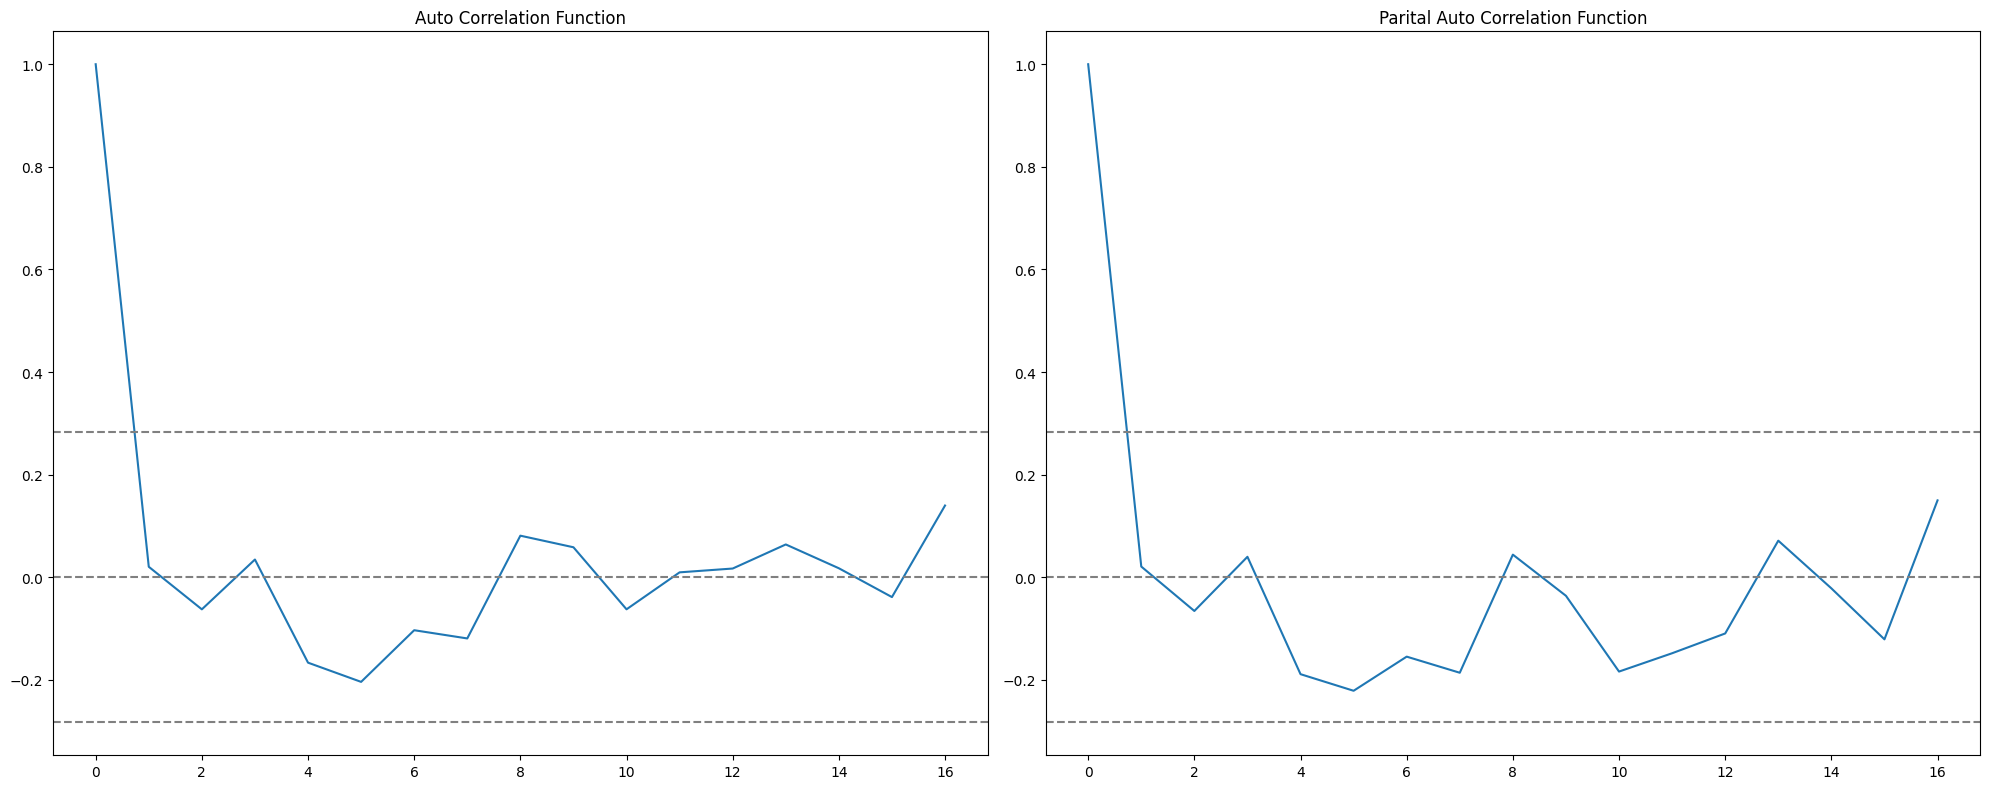

In [ ]:
# Plotting ACF and PACF plot to identify the values of P AND Q:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [ ]:
#pdq values are 3,1,2:
p, d, q = 3, 1, 2
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()

# Get predictions on historical data:
predictions = arima_result.predict()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

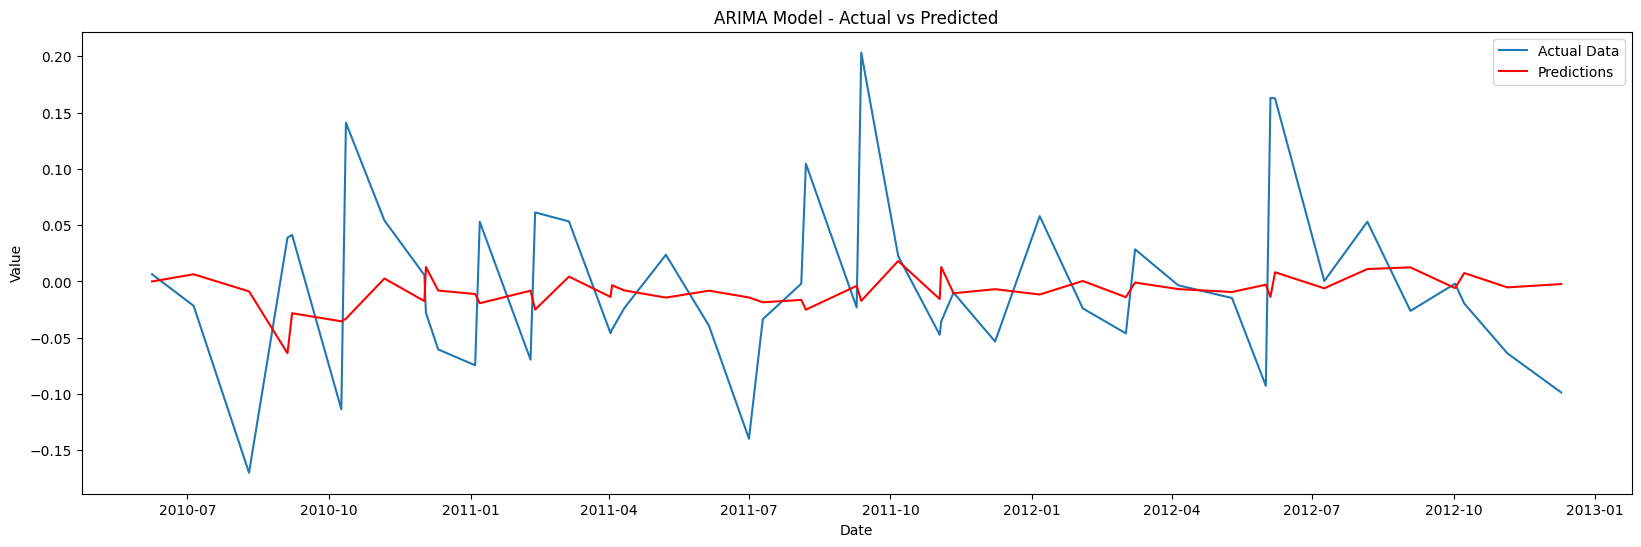

In [ ]:
# Plotting actual and predictions:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# Checking accuracy of the model with mse:

mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.0060249624793857655


In [ ]:
# Checking accuracy of the model with rmse:

rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.07762063178940097


In [ ]:
# Forcasting for next 12 weeks:

forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Here finding dataset end date to continue from there to next 12 weeks:

end_date_actual_data = '2012-12-10'

# Generate dates for the forecasted period
# with the help of datetime function iam creating a time span of 12 weeks:

forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [ ]:
# Creating dataframe with forecasted sales and next 12 weeks dates:

forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [ ]:
forecast_df.set_index('Date',inplace=True)

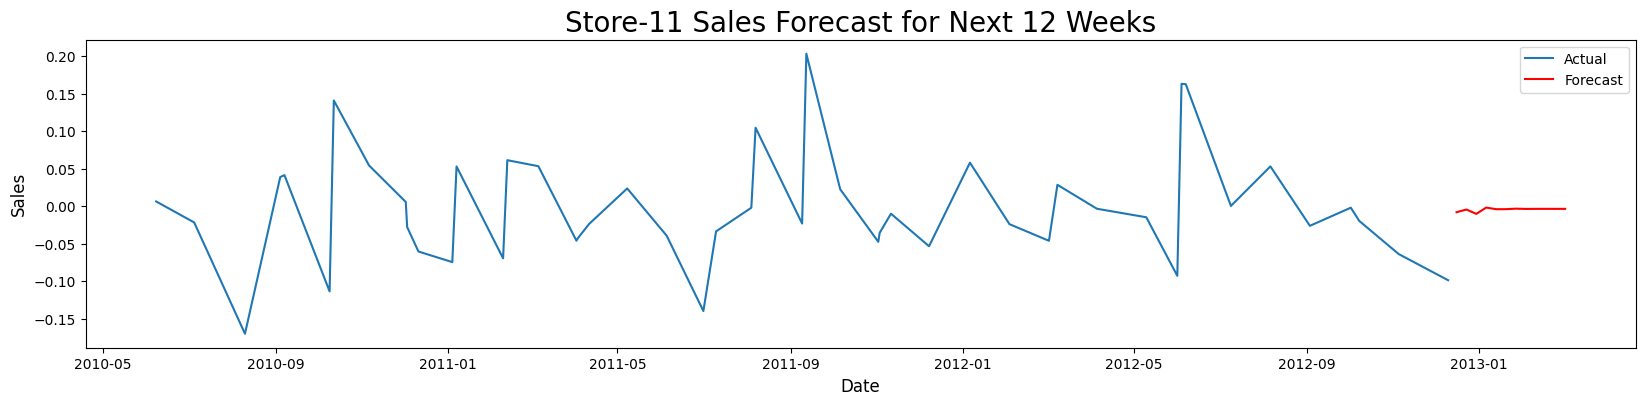

In [ ]:
# Plotting actual and forcast sales for next 12 weeks:

plt.figure(figsize=(20, 4))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-11 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [ ]:
# Checking the Model Accuracy once again:

rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.07762063178940097


**Store 17th Sales Prediction**

In [ ]:
# Creating new data frame for store 11 sales forecast:

store17_sales=df[df['Store']==17].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [ ]:
store17_sales.set_index('Date',inplace=True)

In [ ]:
adf_test(store17_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic      -5.128074
p-value                  0.000012
# lags used              0.000000
# observations          56.000000
critical value (1%)     -3.552928
critical value (5%)     -2.914731
critical value (10%)    -2.595137
Rejects the null hypothesis
Data has no unit root and is stationary


In [ ]:
decomposition=seasonal_decompose(store17_sales['Weekly_Sales'],period=13)

Figure(640x480)


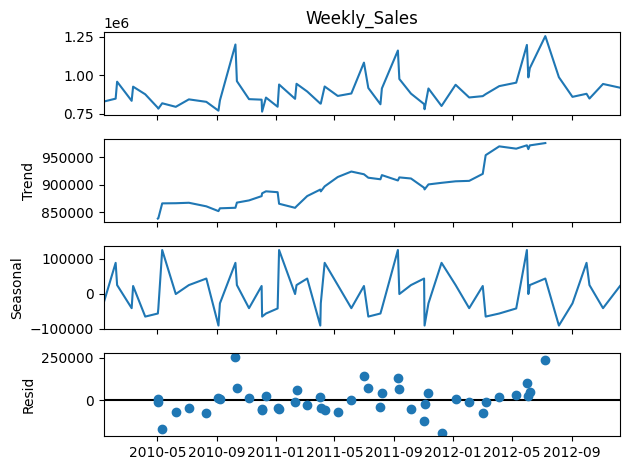

In [ ]:
print(decomposition.plot())

In [ ]:
# Creating Rolling mean and sd:

mean1=store17_sales.rolling(window=10).mean()
std1=store17_sales.rolling(window=10).std()

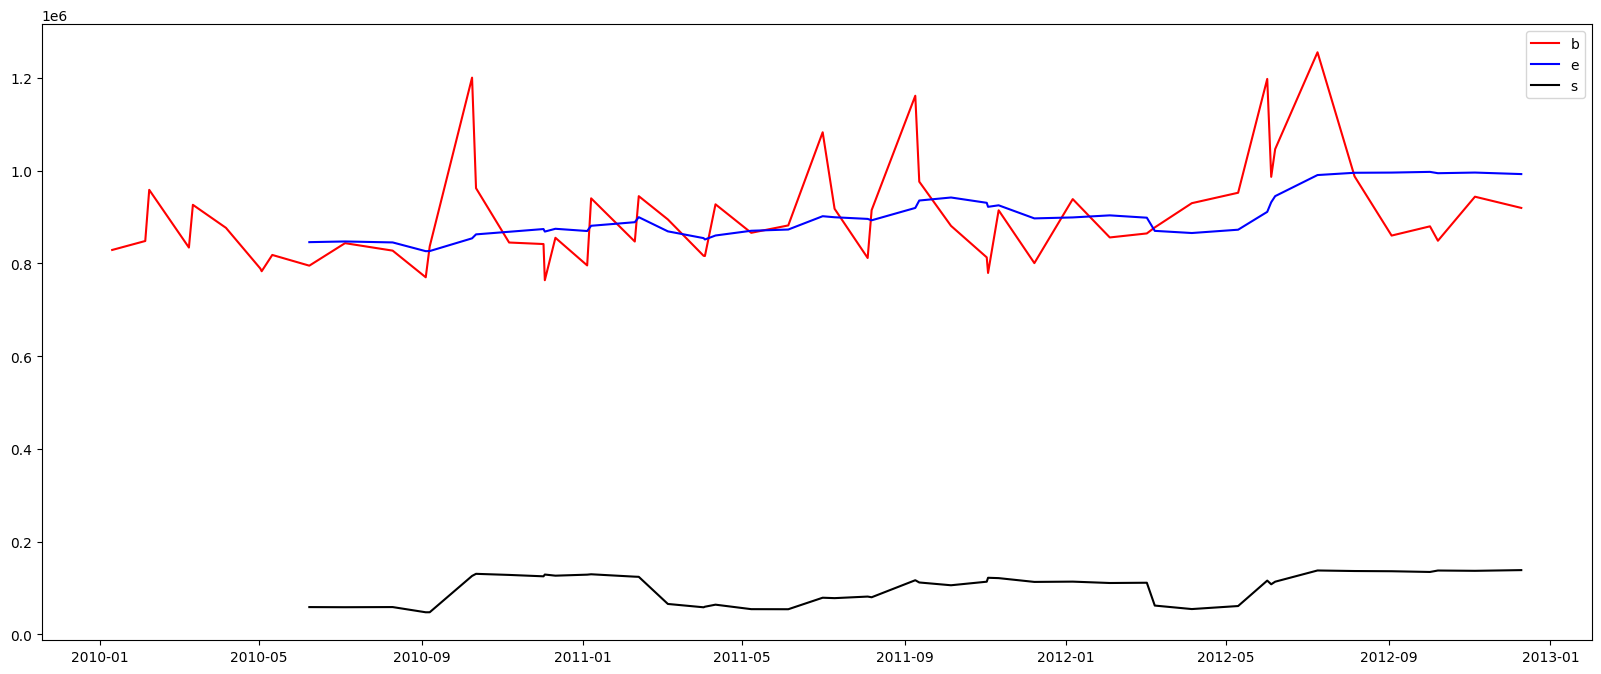

In [ ]:
# Plotting the rolling mean:
plt.figure(figsize=(20,8))
orig=plt.plot(store17_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

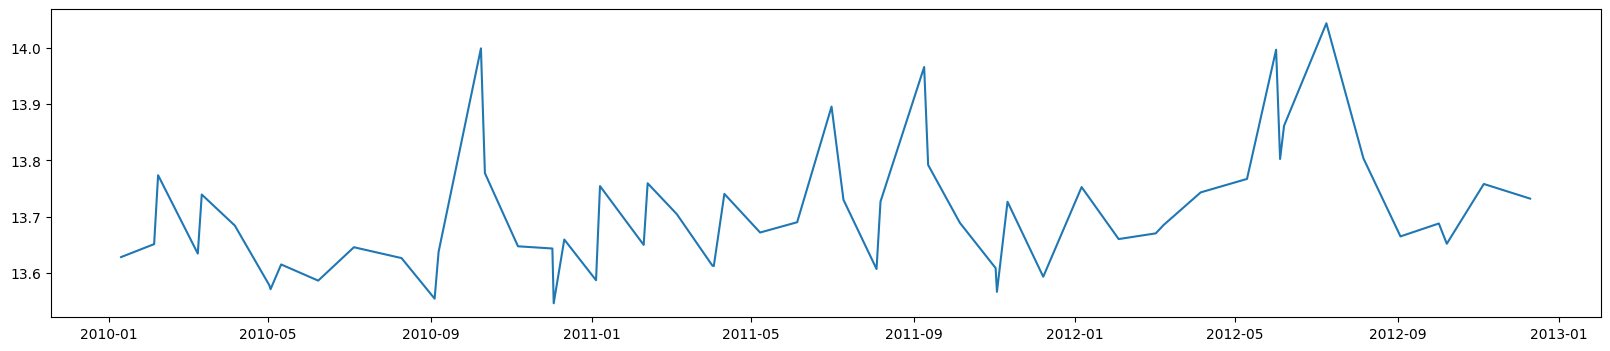

In [ ]:
# Applaying log transformation to the data:

df_log = np.log(store17_sales)
plt.figure(figsize=(20,4))
plt.plot(df_log)

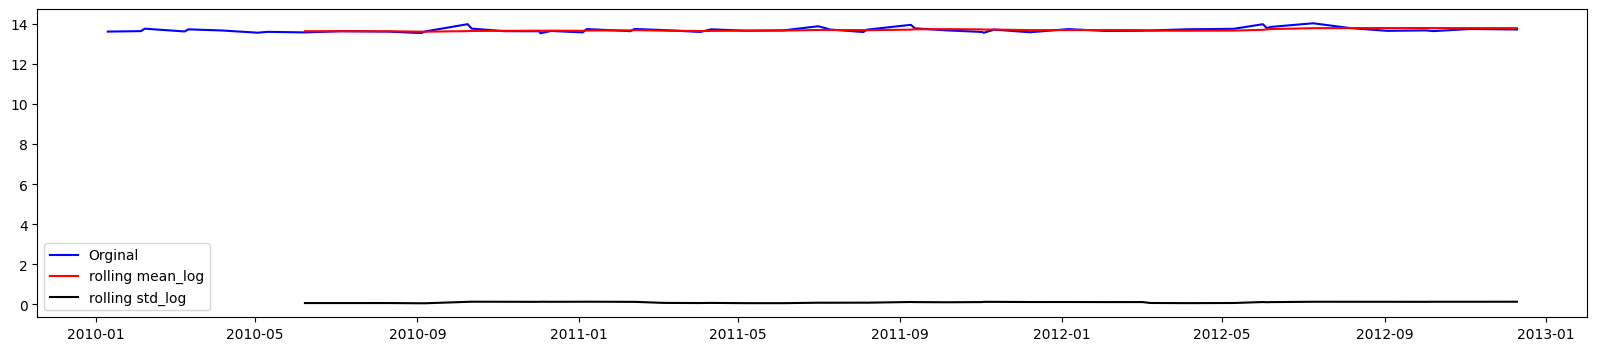

In [ ]:
# After log transformation to the data, comparing actual data with rolling mean and standard deviation:

mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Subtracting log data and mean log data:

df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-01-10           NaN
2010-02-04           NaN
2010-02-07           NaN
2010-03-09           NaN
2010-03-12           NaN
2010-04-06           NaN
2010-05-02           NaN
2010-05-03           NaN
2010-05-11           NaN
2010-06-08     -0.059753
2010-07-05     -0.002251
2010-08-10     -0.019048
2010-09-04     -0.069150
2010-09-07      0.013582
2010-10-09      0.348743
2010-10-12      0.118124
2010-11-06     -0.018632
2010-12-02     -0.029765
2010-12-03     -0.120082
2010-12-11     -0.014253

In [ ]:
df_new.dropna(inplace = True)

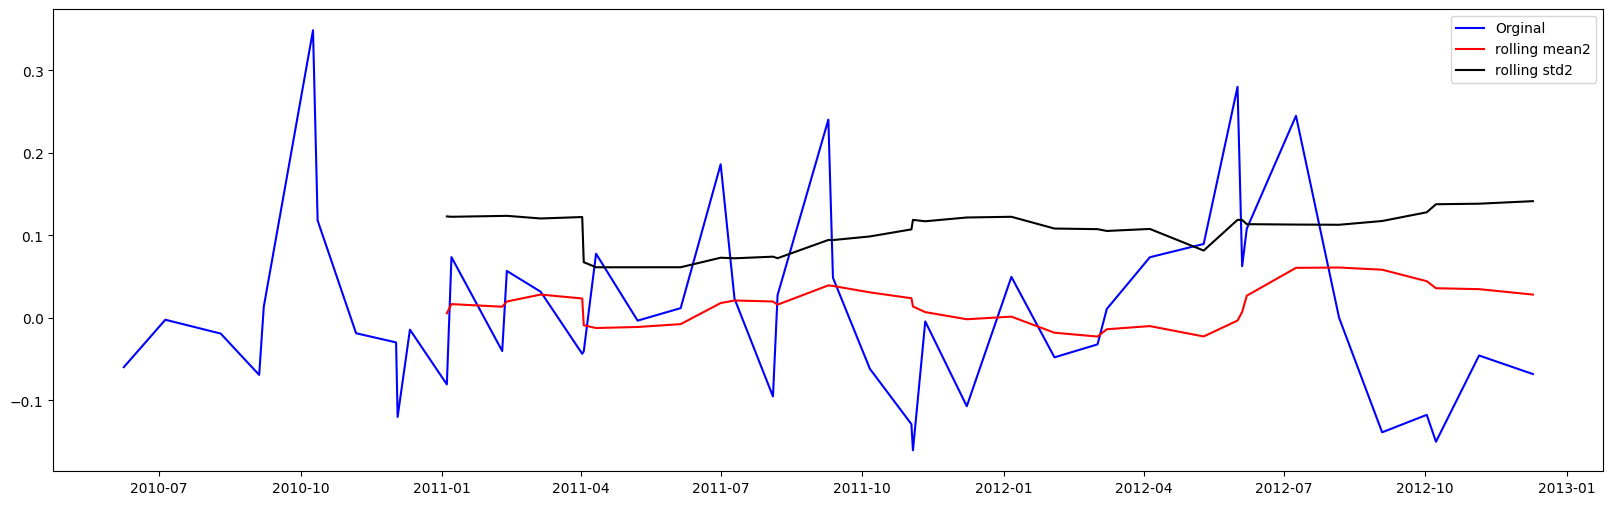

In [ ]:
# After log transformation checking rolling statistics such as mean and standard deviation:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Checking data stationality again after log transformation:

adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic      -4.661285
p-value                  0.000099
# lags used              0.000000
# observations          47.000000
critical value (1%)     -3.577848
critical value (5%)     -2.925338
critical value (10%)    -2.600774
Rejects the null hypothesis
Data has no unit root and is stationary


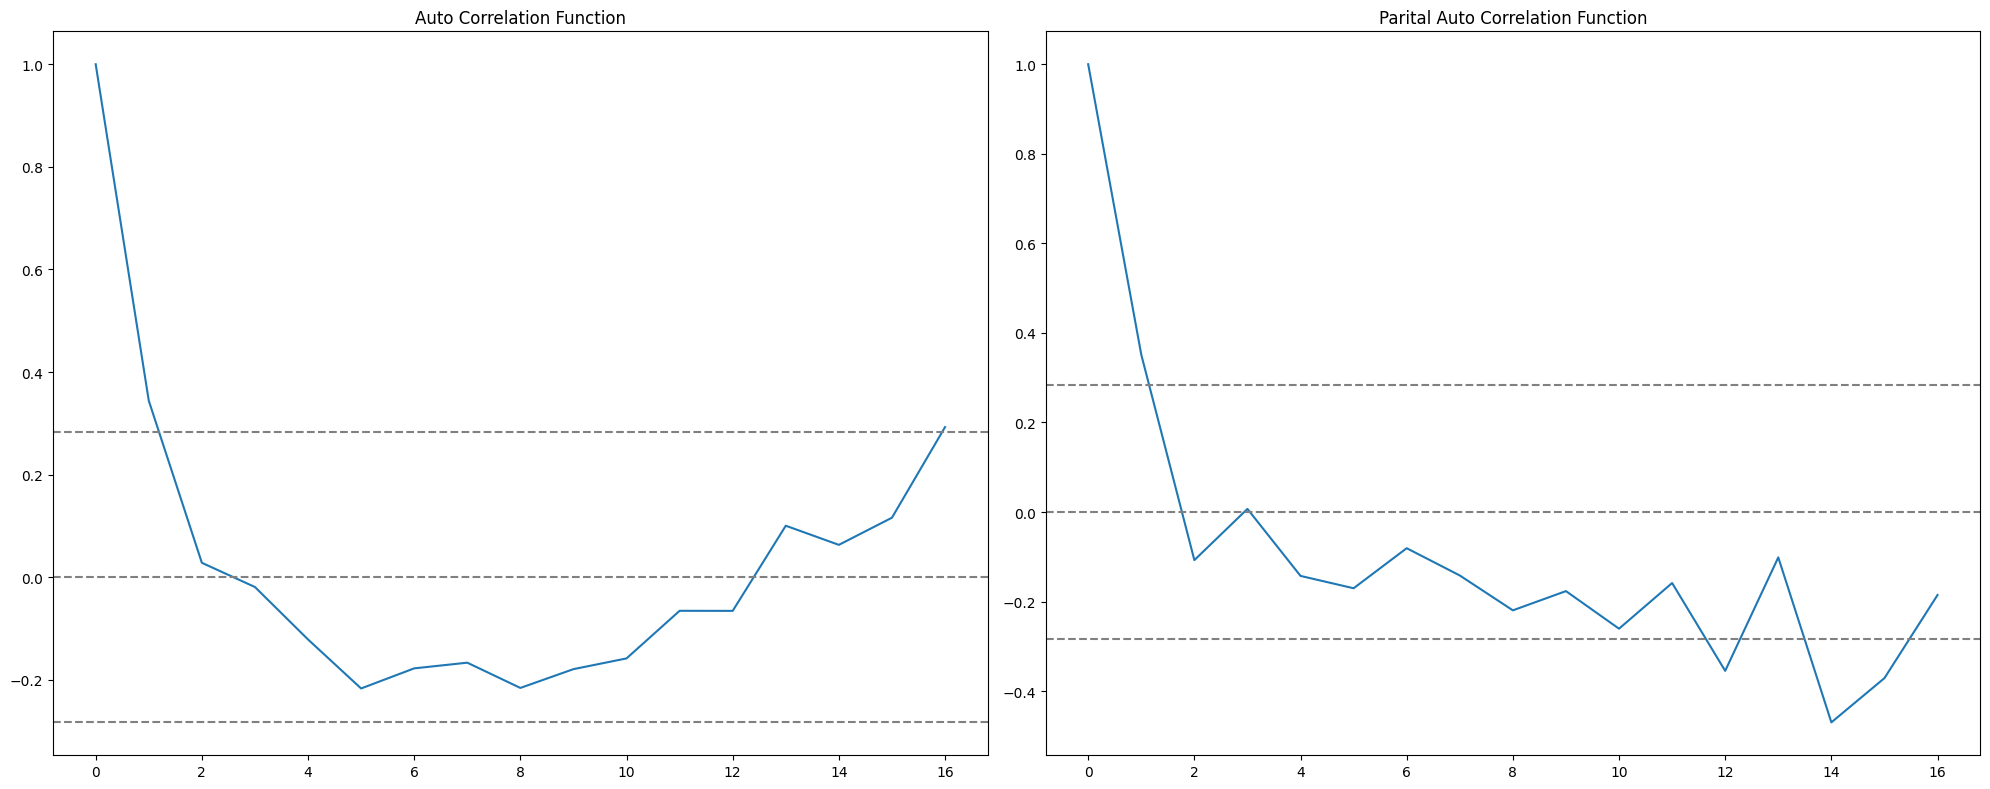

In [ ]:
# Plotting ACF and PACF plot to identify the values of P AND Q:

from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [ ]:
#pdq values are 3,1,3
p, d, q = 3, 1, 3
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()

# Get predictions on historical data:
predictions = arima_result.predict()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


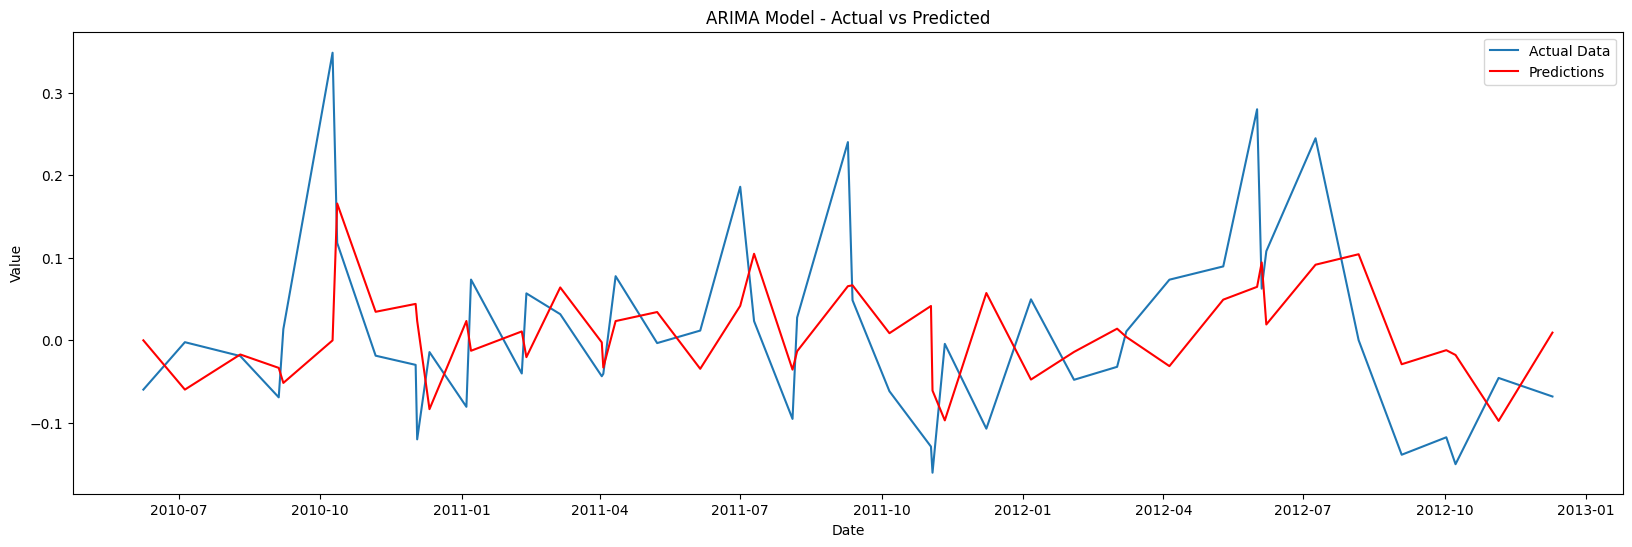

In [ ]:
# Plotting actual and predictions:

plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# Checking accuracy of the model with mse:

mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.010707738740259381


In [ ]:
# Checking accuracy of the model with rmse:

rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.10347820417971787


In [ ]:
# Forcasting for next 12 weeks:

forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Here finding dataset end date, to continue from there to next 12 weeks:

end_date_actual_data = '2012-12-10'

# Generate dates for the forecasted period
# with the help of datetime function iam creating a time span of 12 weeks:

forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [ ]:
# Creating a dataframe with forecasted sales and next 12 weeks dates:

forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [ ]:
forecast_df.set_index('Date',inplace=True)

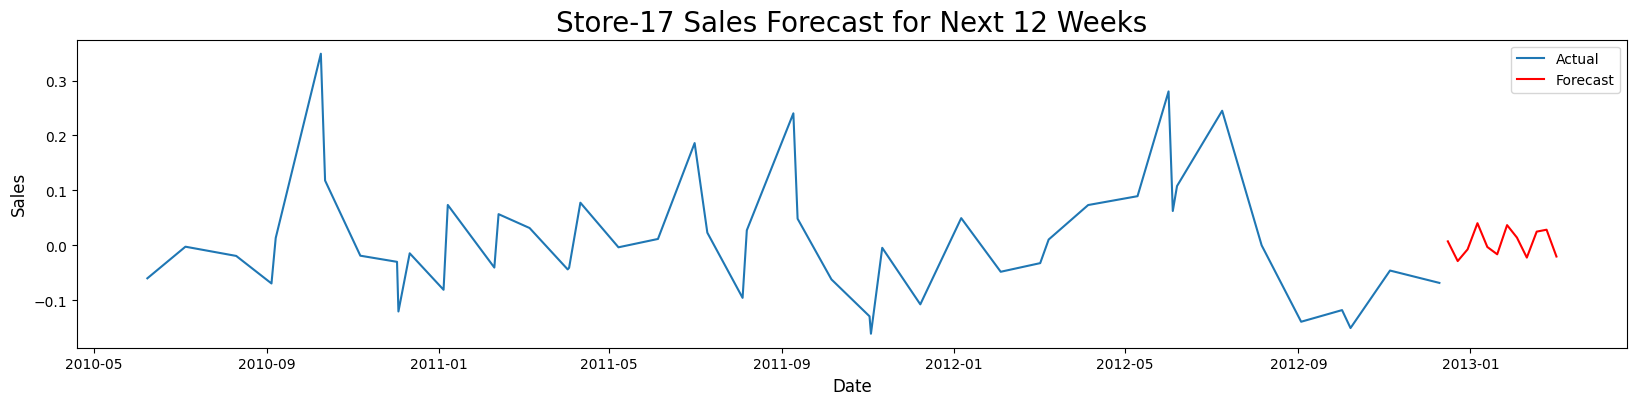

In [ ]:
# Plotting actual and forcast sales for next 12 weeks:

plt.figure(figsize=(20, 4))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-17 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [ ]:
# Checking Model Accuracy once again:

rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.10347820417971787
